In [1]:
!pip install mne torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:0000:01


In [2]:
import mne

Extracting EDF parameters from /kaggle/input/stroke-dataset-liu/edffile/edffile/sub-01/eeg/sub-01_task-motor-imagery_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_37/1717005062.py:11: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(file_path, preload=True)


Reading 0 ... 159999  =      0.000 ...   319.998 secs...
--- Basic Dataset Info ---
<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FP2, Fz, F3, F4, F7, F8, FCz, FC3, FC4, FT7, FT8, Cz, C3, ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2022-12-01 18:58:12 UTC
 nchan: 33
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: Anonymous, birthday: 1951-05-13>
>

Number of channels: 33
Channel names: ['FP1', 'FP2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FCz', 'FC3', 'FC4', 'FT7', 'FT8', 'Cz', 'C3', 'C4', 'T3', 'T4', 'CPz', 'CP3', 'CP4', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'T5', 'T6', 'Oz', 'O1', 'O2', 'HEOL', 'HEOR', '']
Sampling frequency: 500.0 Hz

--- Annotations (Events/Tasks) ---
<Annotations | 0 segments>

Event counts: {}

Plotting raw data... (Close the plot window to continue)
Using matplotlib as 2D backend.


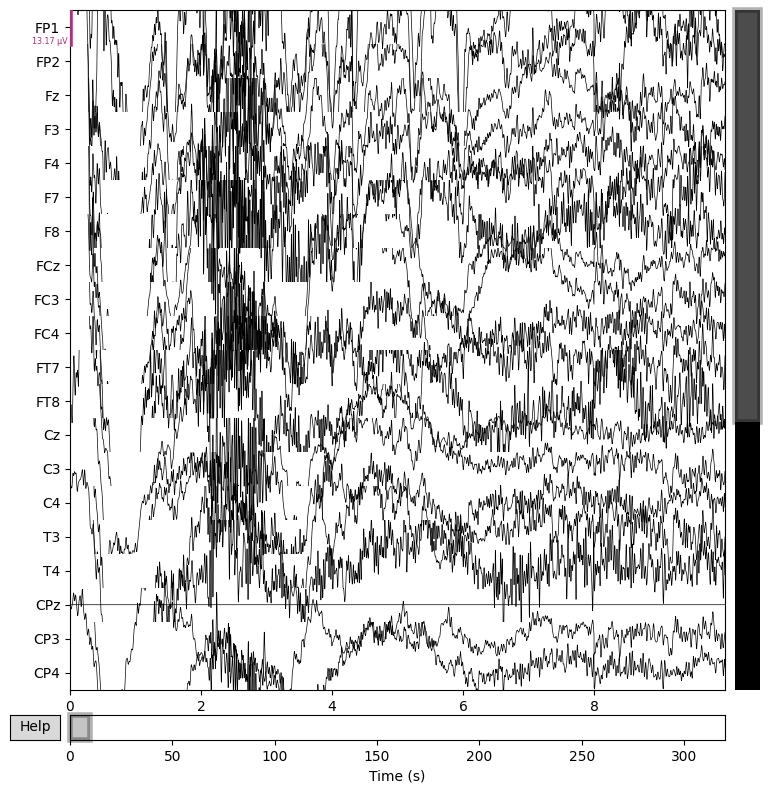


Plotting Power Spectral Density (PSD)... (Close the plot window to continue)
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_37/1717005062.py:52: UserWarning: Zero value in spectrum for channel CPz
  raw.compute_psd().plot()
/tmp/ipykernel_37/1717005062.py:52: UserWarning: Infinite value in PSD for channel CPz.
These channels might be dead.
  raw.compute_psd().plot()
/tmp/ipykernel_37/1717005062.py:52: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()



EDA complete. Ready for preprocessing.


<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FP2, Fz, F3, F4, F7, F8, FCz, FC3, FC4, FT7, FT8, Cz, C3, ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2022-12-01 18:58:12 UTC
 nchan: 33
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: Anonymous, birthday: 1951-05-13>
>

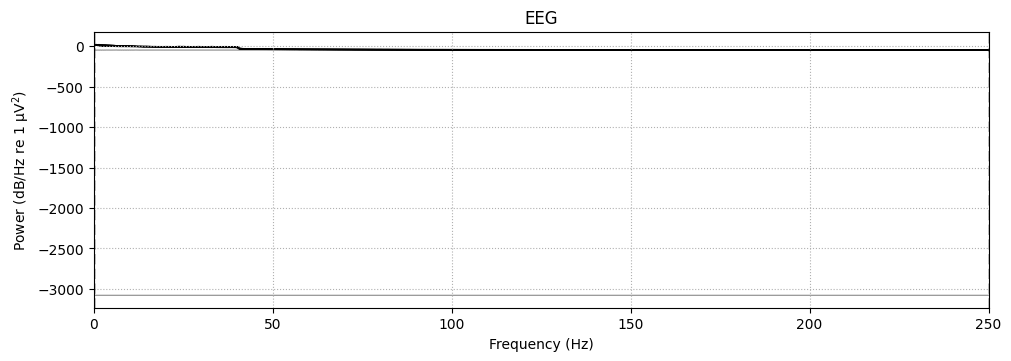

In [3]:
import mne
import matplotlib.pyplot as plt

# --- 1. LOAD THE DATA ---
# Update this path to point to one of your downloaded .edf files
file_path = '/kaggle/input/stroke-dataset-liu/edffile/edffile/sub-01/eeg/sub-01_task-motor-imagery_eeg.edf'

# Load the raw EDF file. 
# preload=True loads the data into memory, which is necessary for filtering and analysis.
try:
    raw = mne.io.read_raw_edf(file_path, preload=True)
except Exception as e:
    print(f"Error loading file: {e}")
    print("Please ensure the file path is correct and the file is a valid EDF.")
    exit()


# --- 2. INSPECT BASIC FILE INFO ---
print("--- Basic Dataset Info ---")
# The 'info' object contains all the metadata
print(raw.info)

# Print key information
print(f"\nNumber of channels: {raw.info['nchan']}")
print(f"Channel names: {raw.ch_names}")
print(f"Sampling frequency: {raw.info['sfreq']} Hz")


# --- 3. INSPECT ANNOTATIONS (CRITICAL FOR MI) ---
print("\n--- Annotations (Events/Tasks) ---")
# Annotations mark the start and duration of different tasks (e.g., 'left_hand', 'right_hand', 'rest')
# The labels (e.g., 'T1', 'T2') are defined by the dataset creators.
print(raw.annotations)
# You can get a count of each event type
print(f"\nEvent counts: {raw.annotations.count()}")


# --- 4. VISUALIZE THE RAW DATA ---
print("\nPlotting raw data... (Close the plot window to continue)")
# This plot is interactive. You can scroll through time and see all channels.
# It's the best way to visually check for bad channels or large artifacts (like blinks or muscle noise).
raw.plot(duration=10, n_channels=20, scalings='auto', block=True)


# --- 5. VISUALIZE POWER SPECTRAL DENSITY (PSD) ---
print("\nPlotting Power Spectral Density (PSD)... (Close the plot window to continue)")
# The PSD shows the power of different frequencies in your signal.
# For MI, we expect to see activity in the alpha (8-12 Hz) and beta (13-30 Hz) bands.
# This plot is ALSO excellent for spotting:
#   1. 50Hz or 60Hz line noise (a large spike)
#   2. Low-frequency drift (high power near 0 Hz)
raw.compute_psd().plot()

print("\nEDA complete. Ready for preprocessing.")

raw.info

Attempting to load data from:
EDF: /kaggle/input/stroke-dataset-liu/edffile/edffile/sub-01/eeg/sub-01_task-motor-imagery_eeg.edf
TSV: /kaggle/input/stroke-dataset-liu/task-motor-imagery_events.tsv
Extracting EDF parameters from /kaggle/input/stroke-dataset-liu/edffile/edffile/sub-01/eeg/sub-01_task-motor-imagery_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 159999  =      0.000 ...   319.998 secs...

Successfully loaded EDF file.

Successfully loaded TSV events file. First 5 rows:
   onset  duration  trial_type  response_time  value  stim_file
0      1      2000           1            NaN      1  stim1.png
1   2001      4000           1            NaN      2  stim2.mp4
2   6001      2000           1            NaN      3  stim3.png
3   8001      2000           2            NaN      1  stim1.png
4  10001      4000           2            NaN      2  stim2.mp4

Filtered for 'Motor imagery beginning' (value=2) events:
    onset 

/tmp/ipykernel_37/3278976653.py:18: RuntimeWarning: Physical range is not defined in following channels:
CPz
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: Runtime

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)

Filtering complete (8-30 Hz band-pass, 50 Hz notch).
Used Annotations descriptions: ['MotorImagery/LeftHand', 'MotorImagery/RightHand']

Extracted 40 events from annotations.
Event IDs found: {'MotorImagery/LeftHand': 1, 'MotorImagery/RightHand': 2}
First 5 event markers [sample_number, 0, event_id]:
[[ 1000     0     1]
 [ 5000     0     2]
 [ 9000     0     1]
 [13000     0     2]
 [17000     0     1]]
Not setting metadata
40 matc

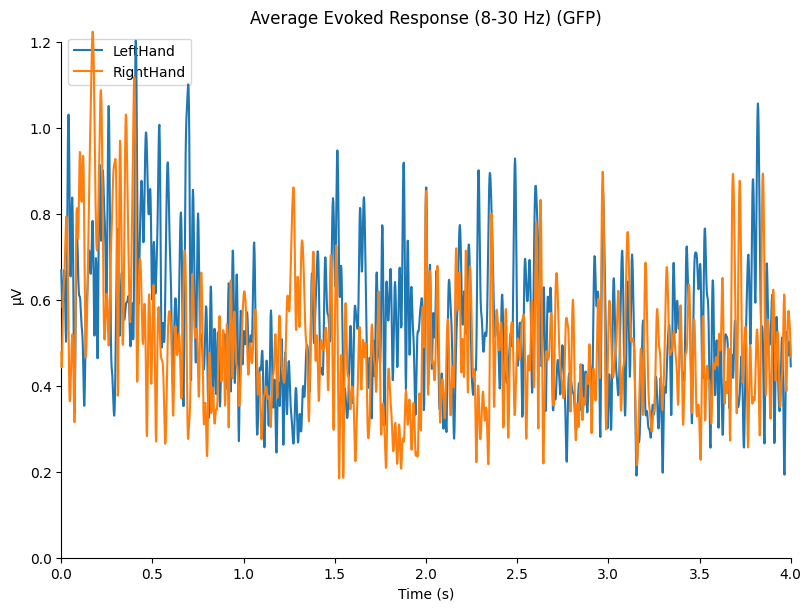

Plotting PSD of epoched data...
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


/tmp/ipykernel_37/3278976653.py:175: UserWarning: Zero value in spectrum for channel CPz
  fig2 = epochs.compute_psd().plot(show=True) # Set to True to display interactively
/tmp/ipykernel_37/3278976653.py:175: UserWarning: Infinite value in PSD for channel CPz.
These channels might be dead.
  fig2 = epochs.compute_psd().plot(show=True) # Set to True to display interactively
/tmp/ipykernel_37/3278976653.py:175: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig2 = epochs.compute_psd().plot(show=True) # Set to True to display interactively




Pipeline step complete. You now have filtered, epoched data.
Run 'plt.show()' if plots are not displaying automatically.


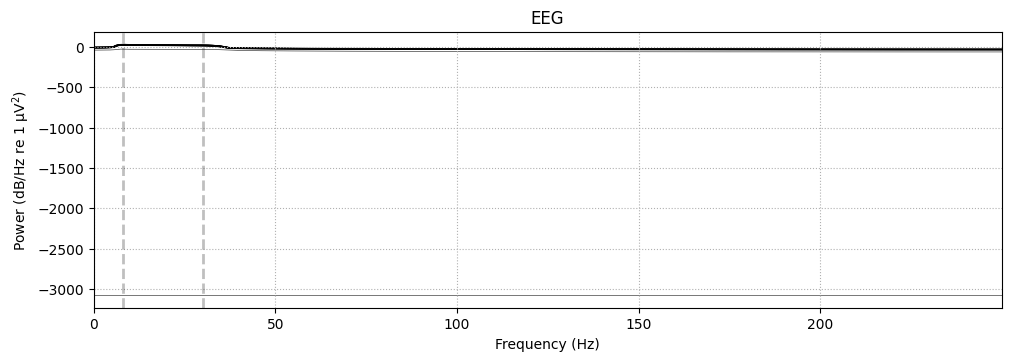

In [4]:
import mne
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. SET FILE PATHS ---
# !!! PLEASE UPDATE THESE PATHS !!!
# You need to provide the path to both the EDF file and its matching _events.tsv file
edf_file_path = '/kaggle/input/stroke-dataset-liu/edffile/edffile/sub-01/eeg/sub-01_task-motor-imagery_eeg.edf'
tsv_file_path = '/kaggle/input/stroke-dataset-liu/task-motor-imagery_events.tsv'

print(f"Attempting to load data from:")
print(f"EDF: {edf_file_path}")
print(f"TSV: {tsv_file_path}")

# --- 2. LOAD RAW EEG DATA ---
try:
    # Load the raw EDF file, preload=True to load data into memory
    raw = mne.io.read_raw_edf(edf_file_path, preload=True)
    print("\nSuccessfully loaded EDF file.")
except FileNotFoundError:
    print(f"\n--- ERROR: EDF File Not Found ---")
    print(f"Could not find file: {edf_file_path}")
    print("Please update the 'edf_file_path' variable to the correct location.")
    exit()
except Exception as e:
    print(f"\n--- ERROR loading EDF file ---")
    print(e)
    exit()

# --- 3. LOAD & INSPECT EVENTS.TSV FILE ---
try:
    # The event file is a Tab-Separated Value (TSV) file
    events_df = pd.read_csv(tsv_file_path, sep='\t')
    print("\nSuccessfully loaded TSV events file. First 5 rows:")
    print(events_df.head())
except FileNotFoundError:
    print(f"\n--- ERROR: TSV File Not Found ---")
    print(f"Could not find file: {tsv_file_path}")
    print("Please update the 'tsv_file_path' variable to the correct location.")
    exit()
except Exception as e:
    print(f"\n--- ERROR loading TSV file ---")
    print(e)
    exit()

# --- 4. MAP EVENT CODES TO DESCRIPTIVE LABELS ---
# Based on the info you provided:
# "trial_type": {"1": "Left hand", "2": "Right hand"}
# "value": {"1": "Instruction", "2": "MI beginning", "3": "Break"}

# We are interested in the *start* of the MI task, which is value=2
mi_start_events_df = events_df[events_df['value'] == 2].copy()

# Create a new 'description' column based on the 'trial_type'
# We'll create BIDS-compatible hierarchical event names
mi_start_events_df['description'] = mi_start_events_df['trial_type'].map({
    1: 'MotorImagery/LeftHand',
    2: 'MotorImagery/RightHand'
})

print(f"\nFiltered for 'Motor imagery beginning' (value=2) events:")
print(mi_start_events_df.head())

# --- 5. CREATE MNE ANNOTATIONS ---
# MNE annotations require onset and duration in SECONDS.
# Your file provides them in MILLISECONDS, so we must divide by 1000.
onset_sec = mi_start_events_df['onset'] / 1000.0
duration_sec = mi_start_events_df['duration'] / 1000.0
description = mi_start_events_df['description']

# Create the Annotations object
# We set orig_time to match the raw data's measurement date to align them
annotations = mne.Annotations(onset=onset_sec,
                              duration=duration_sec,
                              description=description,
                              orig_time=raw.info['meas_date'])

# Apply these new, descriptive annotations to our raw data
# This will overwrite any existing annotations (which is what we want)
raw.set_annotations(annotations)

print("\nSuccessfully created and set MNE annotations from TSV file.")
print("New annotations in raw object:")
print(raw.annotations)


# --- 6. PRE-PROCESSING: FILTERING ---
# It's crucial to filter *before* epoching
# For Motor Imagery, a common band-pass filter is 8-30 Hz
# We also apply a 50 Hz notch filter for power line noise (adjust to 60 Hz if in the US)
sfreq = raw.info['sfreq']
print(f"\nApplying filters. Sampling frequency: {sfreq} Hz")
raw.filter(l_freq=8.0, h_freq=30.0, fir_design='firwin', skip_by_annotation='edge')
raw.notch_filter(freqs=50.0, fir_design='firwin')

print("Filtering complete (8-30 Hz band-pass, 50 Hz notch).")


# --- 7. CREATE EPOCHS ---
# Now we extract the data segments (epochs) around the events we defined.

# First, get the event markers (timestamps and IDs) from our annotations
# We create a mapping from our new text descriptions to integer IDs
event_id = {
    'MotorImagery/LeftHand': 1,
    'MotorImagery/RightHand': 2
}

# events_from_annotations returns the event array MNE needs
# It will only find events that are in our event_id dictionary
events, event_id_dict = mne.events_from_annotations(raw, event_id=event_id)

if len(events) == 0:
    print("\n--- ERROR: No events found ---")
    print("Could not find any events matching the IDs: ", event_id.keys())
    print("Check your 'value' and 'trial_type' logic in step 4.")
    exit()

print(f"\nExtracted {len(events)} events from annotations.")
print(f"Event IDs found: {event_id_dict}")
print("First 5 event markers [sample_number, 0, event_id]:")
print(events[:5])

# Define the time window for each epoch
# Let's take 4 seconds of data, starting from the event marker (t=0)
# tmin = 0.0 (start at the 'MI beginning' marker)
# tmax = 4.0 (end 4 seconds after the marker)
# Note: The paper mentions "0–4 seconds after stimulus onset"
tmin, tmax = 0.0, 4.0

# Create the Epochs object
# preload=True loads all the epoched data into memory
# baseline=None because we filtered out the low-frequency drift already
epochs = mne.Epochs(raw,
                    events=events,
                    event_id=event_id_dict,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=None,
                    preload=True)

print("\n--- EPOCHING COMPLETE ---")
print("Epochs object info:")
print(epochs)

# You can see the data by event type
print("\nEpochs for Left Hand:")
print(epochs['MotorImagery/LeftHand'])
print("\nEpochs for Right Hand:")
print(epochs['MotorImagery/RightHand'])


# --- 8. VISUALIZE THE EPOCHS ---
# Let's plot the average brain activity for each condition
print("\nPlotting average of epochs for each condition...")

# average() computes the Evoked response (the average over all trials)
evoked_left = epochs['MotorImagery/LeftHand'].average()
evoked_right = epochs['MotorImagery/RightHand'].average()

# Plot them both, with a split-second view for comparison
fig1 = mne.viz.plot_compare_evokeds(dict(LeftHand=evoked_left, RightHand=evoked_right),
                                    legend='upper left',
                                    title='Average Evoked Response (8-30 Hz)',
                                    show=True, # Set to True to display interactively
                                   )

# Save the plot to a file
plot_filename = 'evoked_response_comparison.png'


# Plot the PSD of the epoched data
print("Plotting PSD of epoched data...")
# By default, plot() will create a new figure
fig2 = epochs.compute_psd().plot(show=True) # Set to True to display interactively

psd_filename = 'epochs_psd.png'


print("\n\nPipeline step complete. You now have filtered, epoched data.")
print("Run 'plt.show()' if plots are not displaying automatically.")
# You may need to call plt.show() at the end if plots don't appear
# plt.show()

In [5]:
# Import Standard Libraries (Available on Kaggle)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import signal
import random
import time
import warnings
import math
from tqdm.notebook import tqdm
import mne
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

print("PyTorch version:", torch.__version__)
print("Device:", "CUDA" if torch.cuda.is_available() else "CPU")

PyTorch version: 2.6.0+cu124
Device: CUDA


In [6]:
import os
import numpy as np
import pandas as pd
import mne
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import hilbert

# --- Suppress MNE's verbose logging ---
warnings.filterwarnings('ignore')
mne.set_log_level('ERROR')

# =========================================================================
# --- Configuration ---
# =========================================================================
# 1. IMPORTANT: Please verify these paths are correct for your system.
EDF_FILE_PATH = "/kaggle/input/stroke-dataset-liu/edffile/edffile/sub-01/eeg/sub-01_task-motor-imagery_eeg.edf"
TSV_FILE_PATH = "/kaggle/input/stroke-dataset-liu/task-motor-imagery_events.tsv"

# 2. Parameters from your class (for standalone testing)
SAMPLING_RATE = 500.0
LOW_FREQ = 8.0
HIGH_FREQ = 30.0
NOTCH_FREQ = 50.0

# =========================================================================
# --- Step 1: Load Raw Data ---
# =========================================================================
print("--- Step 1: Loading Raw Data ---")

if not os.path.exists(EDF_FILE_PATH):
    print(f"Error: EDF file not found at {EDF_FILE_PATH}")
    # Stop here if the file doesn't exist
else:
    try:
        # Load the raw data file for Subject 1
        raw = mne.io.read_raw_edf(EDF_FILE_PATH, preload=True)
        
        # Manually set the sampling rate if it's not read correctly
        # (Though MNE should handle this from the EDF header)
        if raw.info['sfreq'] != SAMPLING_RATE:
            print(f"Warning: Raw SFreq ({raw.info['sfreq']}) doesn't match class SFreq ({SAMPLING_RATE}).")
            # We'll trust the file's header for now.
        
        # We need to drop non-EEG channels to clean up the plots
        # Your class does this with pick_types, so we'll do it here.
        raw.pick_types(eeg=True, exclude='bads')
        
        print("\nSuccessfully loaded raw data.")
        print("--- MNE Raw Info (Subject 01) ---")
        print(raw.info)

    except Exception as e:
        print(f"Error loading EDF file: {e}")

--- Step 1: Loading Raw Data ---

Successfully loaded raw data.
--- MNE Raw Info (Subject 01) ---
<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FP2, Fz, F3, F4, F7, F8, FCz, FC3, FC4, FT7, FT8, Cz, C3, ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2022-12-01 18:58:12 UTC
 nchan: 33
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: Anonymous, birthday: 1951-05-13>
>


--- Step 2: Plotting Raw Data (Before Filtering) ---
 > Generating interactive raw signal plot...


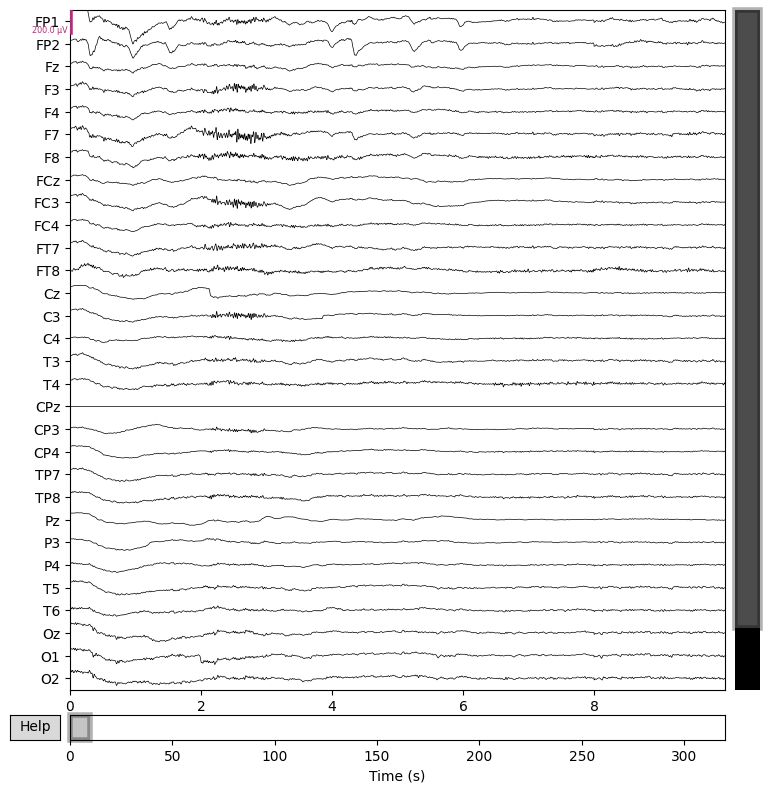

 > Generating PSD plot...


<Figure size 1200x600 with 0 Axes>

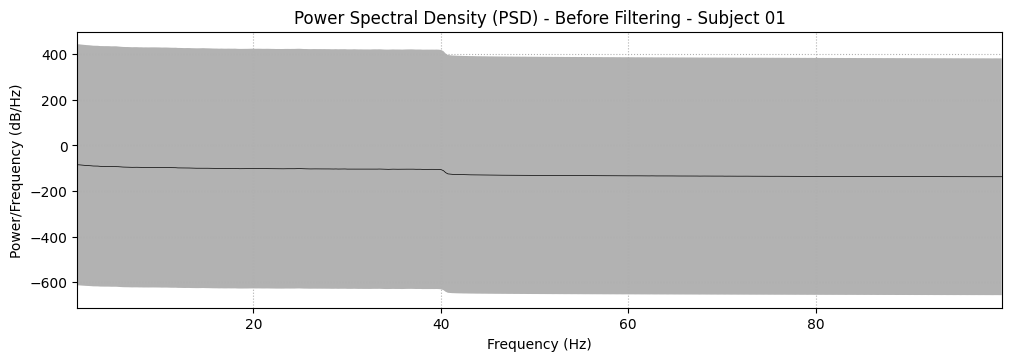

In [7]:
# =========================================================================
# --- Step 2: Visualize Raw Data (Before Filtering) ---
# =========================================================================
print("--- Step 2: Plotting Raw Data (Before Filtering) ---")

if 'raw' not in locals() or not isinstance(raw, mne.io.BaseRaw):
    print("Error: 'raw' object not found. Please run Step 1 first.")
else:
    try:
        # --- 1. Plot Raw Time-Series ---
        # This plot is interactive. You can scroll through the data.
        # Look for:
        #   - Large, slow drifts (baseline wandering)
        #   - Any channels that look "flat" (dead)
        #   - Sudden large spikes (artifacts)
        print(" > Generating interactive raw signal plot...")
        # We'll plot a 10-second duration to keep it manageable
        raw_plot = raw.plot(duration=10.0, n_channels=30, scalings=dict(eeg=100e-6),
                            title="Raw Signal (Before Filtering) - Subject 01")
        # In interactive environments (like Jupyter), this plot will pop up.
        # For scripts, you might need plt.show() after all plots are generated.

        # --- 2. Plot Power Spectral Density (PSD) ---
        # This plot shows power at each frequency.
        # Look for:
        #   - A very large, sharp peak at 50 Hz (power line noise).
        #   - High power below ~5 Hz (DC drift / biological artifacts).
        #   - Our target band (8-30 Hz) should have some power, but
        #     it will be mixed with all this noise.
        print(" > Generating PSD plot...")
        plt.figure(figsize=(12, 6))
        
        # Use welch method for a clearer PSD
        # .compute_psd() is the modern way, replacing .plot_psd()
        psd = raw.compute_psd(method='welch', fmin=1.0, fmax=100.0)
        fig = psd.plot(average=True, show=False) # average=True plots the mean across channels
        
        # Add titles and labels for clarity
        fig.axes[0].set_title("Power Spectral Density (PSD) - Before Filtering - Subject 01")
        fig.axes[0].set_xlabel("Frequency (Hz)")
        fig.axes[0].set_ylabel("Power/Frequency (dB/Hz)")
        
        # Explicitly show the plot
        plt.show()
 

    except Exception as e:
        print(f"Error during plotting: {e}")

--- Step 3: Applying Filters and Plotting (After Filtering) ---
 > Filters applied: 8.0-30.0 Hz band-pass, 50.0 Hz notch.
 > Generating interactive filtered signal plot...


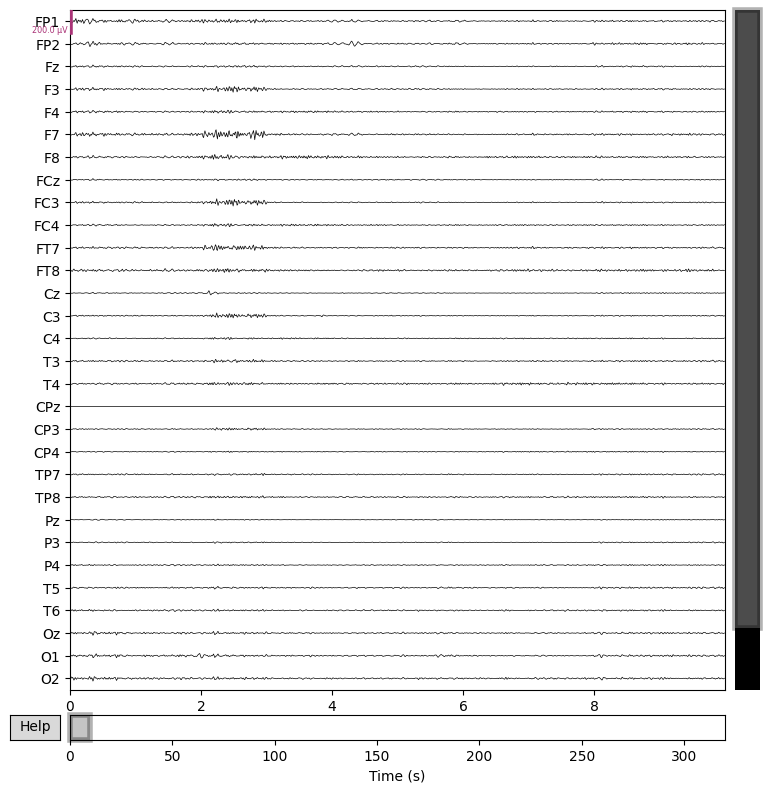

 > Generating filtered PSD plot...


<Figure size 1200x600 with 0 Axes>

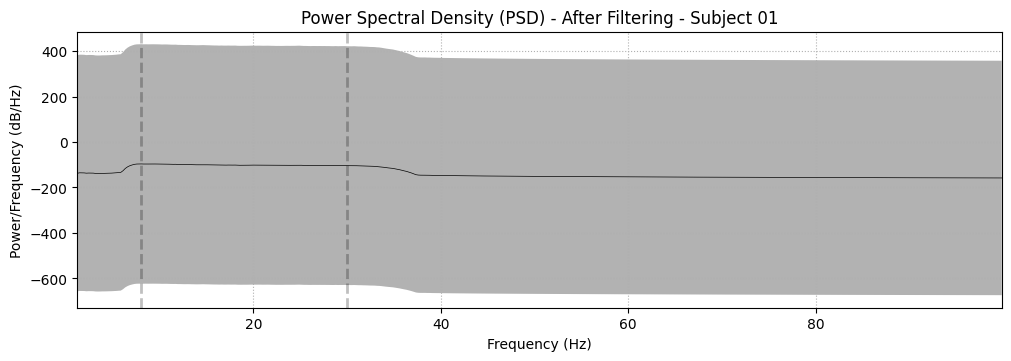

In [8]:
# =========================================================================
# --- Step 3: Apply Filters and Visualize (After Filtering) ---
# =========================================================================
print("--- Step 3: Applying Filters and Plotting (After Filtering) ---")

if 'raw' not in locals() or not isinstance(raw, mne.io.BaseRaw):
    print("Error: 'raw' object not found. Please run Step 1 & 2 first.")
else:
    try:
        # --- 1. Apply the Filters ---
        # We make a copy to keep the original 'raw' object for comparison
        raw_filtered = raw.copy()
        
        # Apply band-pass filter
        raw_filtered.filter(l_freq=LOW_FREQ, h_freq=HIGH_FREQ,
                            fir_design='firwin', verbose=False)
        
        # Apply notch filter
        raw_filtered.notch_filter(freqs=NOTCH_FREQ, fir_design='firwin', verbose=False)
        
        print(f" > Filters applied: {LOW_FREQ}-{HIGH_FREQ} Hz band-pass, {NOTCH_FREQ} Hz notch.")

        # --- 2. Plot Filtered Time-Series ---
        # Look for:
        #   - The slow, large drifts should be gone.
        #   - The signal should look "cleaner" and more focused.
        print(" > Generating interactive filtered signal plot...")
        filt_plot = raw_filtered.plot(duration=10.0, n_channels=30, scalings=dict(eeg=100e-6),
                                      title="Filtered Signal (After Filtering) - Subject 01")

        # --- 3. Plot Filtered Power Spectral Density (PSD) ---
        # This is the key validation plot.
        # Look for:
        #   - The 50 Hz spike should be GONE.
        #   - The power below 8 Hz should be heavily attenuated (cut off).
        #   - The power above 30 Hz should also be cut off.
        #   - The only remaining power should be in our 8-30 Hz band.
        print(" > Generating filtered PSD plot...")
        plt.figure(figsize=(12, 6))
        
        psd_filtered = raw_filtered.compute_psd(method='welch', fmin=1.0, fmax=100.0)
        fig_filtered = psd_filtered.plot(average=True, show=False)
        
        # Add titles and labels for clarity
        fig_filtered.axes[0].set_title("Power Spectral Density (PSD) - After Filtering - Subject 01")
        fig_filtered.axes[0].set_xlabel("Frequency (Hz)")
        fig_filtered.axes[0].set_ylabel("Power/Frequency (dB/Hz)")
        
        # Explicitly show the plot
        plt.show()
 

    except Exception as e:
        print(f"Error during filtering or plotting: {e}")

--- Step 4: Loading and Analyzing Event Markers ---
 > Found 40 total MI events in TSV file.

--- Event Counts (Class Balance) for Subject 01 ---
 > LeftHand trials: 20
 > RightHand trials: 20
 > Total trials: 40
 > Class Balance: 0.50 Left / 0.50 Right

 > Generating event timing plot...


<Figure size 1200x600 with 0 Axes>

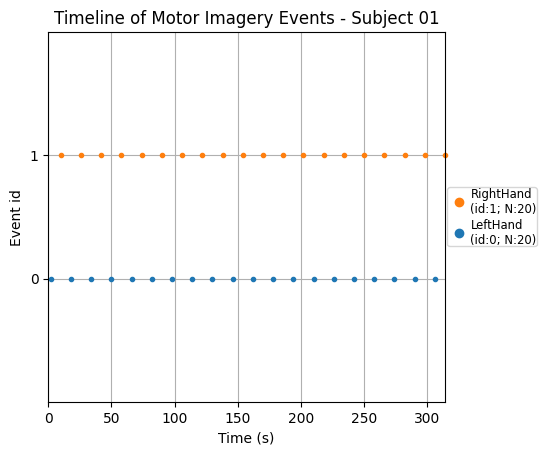

In [9]:
# =========================================================================
# --- Step 4: Load and Visualize Events (Trial Markers) ---
# =========================================================================
print("--- Step 4: Loading and Analyzing Event Markers ---")

if 'raw_filtered' not in locals() or not isinstance(raw_filtered, mne.io.BaseRaw):
    print("Error: 'raw_filtered' object not found. Please run Step 3 first.")
elif not os.path.exists(TSV_FILE_PATH):
    print(f"Error: TSV file not found at {TSV_FILE_PATH}")
else:
    try:
        # --- 1. Load and Parse TSV File (Replicating your class logic) ---
        events_df = pd.read_csv(TSV_FILE_PATH, sep='\t')
        
        # Filter for MI tasks (value == 2)
        mi_events_df = events_df[events_df['value'] == 2].copy()
        
        # Map trial types to labels
        label_mapping = {1: 'LeftHand', 2: 'RightHand'}
        mi_events_df['description'] = mi_events_df['trial_type'].map(label_mapping)
        
        # Drop any events that weren't 1 or 2 (if any)
        mi_events_df = mi_events_df.dropna(subset=['description'])

        print(f" > Found {len(mi_events_df)} total MI events in TSV file.")

        # --- 2. Create MNE Annotations ---
        annotations = mne.Annotations(
            onset=mi_events_df['onset'] / 1000.0,  # Convert ms to seconds
            duration=mi_events_df['duration'] / 1000.0, # Convert ms to seconds
            description=mi_events_df['description'],
            orig_time=raw_filtered.info['meas_date']
        )
        
        # Apply annotations to our filtered raw object
        raw_filtered.set_annotations(annotations)
        
        # --- 3. Extract Events and Plot ---
        # Your class uses these event_ids
        event_ids = {'LeftHand': 0, 'RightHand': 1}
        
        # Get the event array (sample_number, 0, event_id)
        events, event_dict = mne.events_from_annotations(raw_filtered, event_id=event_ids, verbose=False)
        
        print("\n--- Event Counts (Class Balance) for Subject 01 ---")
        left_count = (events[:, 2] == event_ids['LeftHand']).sum()
        right_count = (events[:, 2] == event_ids['RightHand']).sum()
        print(f" > LeftHand trials: {left_count}")
        print(f" > RightHand trials: {right_count}")
        print(f" > Total trials: {len(events)}")
        print(f" > Class Balance: {left_count / len(events):.2f} Left / {right_count / len(events):.2f} Right")

        # --- 4. Plot Event Timing ---
        # This plot shows the timing of all events on the raw data timeline
        # It helps confirm the experiment structure (e.g., are trials spaced out?)
        print("\n > Generating event timing plot...")
        plt.figure(figsize=(12, 6))
        fig = mne.viz.plot_events(events, sfreq=raw_filtered.info['sfreq'],
                                  first_samp=raw_filtered.first_samp,
                                  event_id=event_dict, show=False)
        fig.axes[0].set_title("Timeline of Motor Imagery Events - Subject 01")
        plt.show()
 
        
    except Exception as e:
        print(f"Error processing TSV file or events: {e}")

--- Step 5: Epoching and Visualizing Evoked Data ---
 > Created 40 epochs of 4.0s duration.
 > Epochs shape: (40, 33, 2001) (trials, channels, samples)
 > Generating epochs image plot (all trials)...


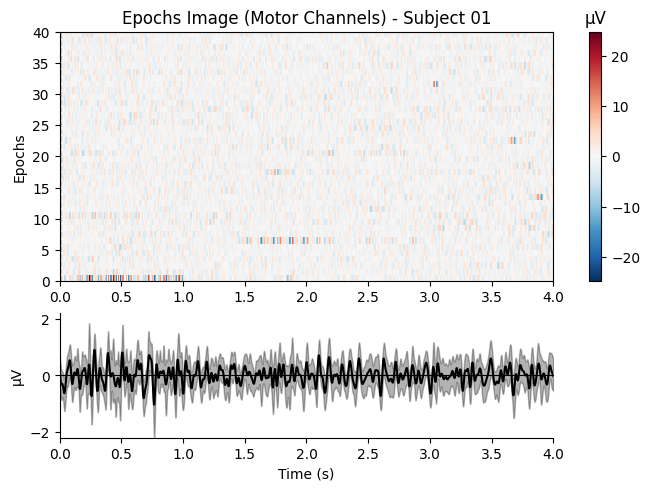

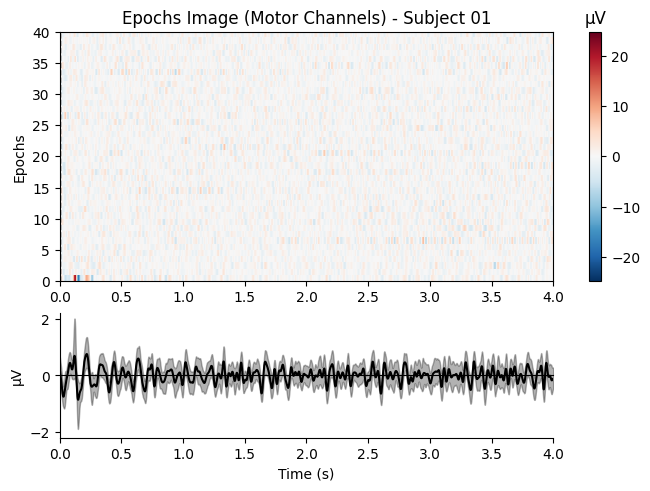

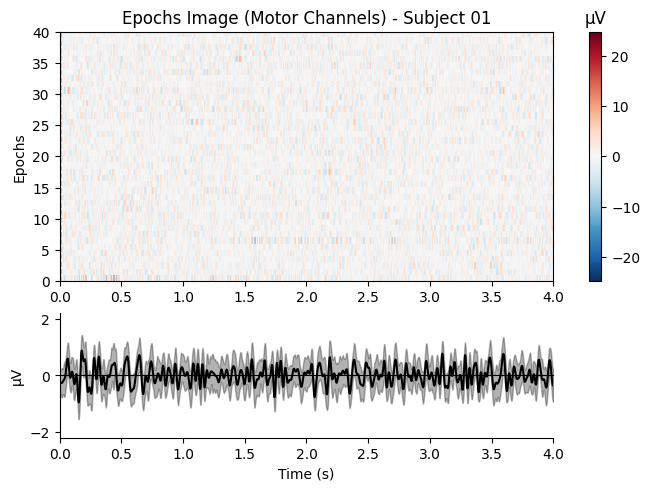

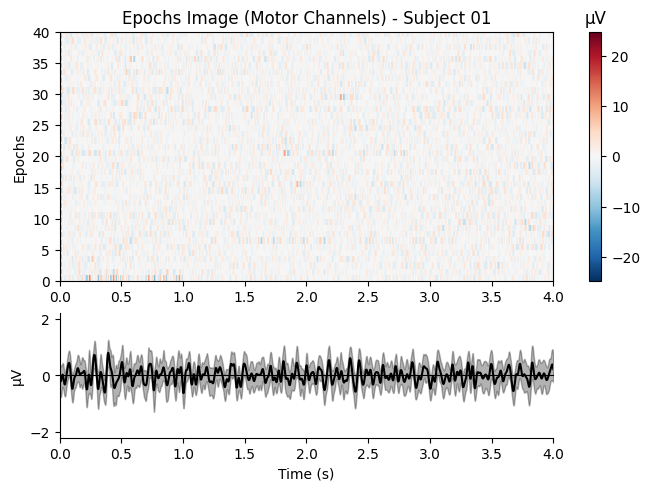

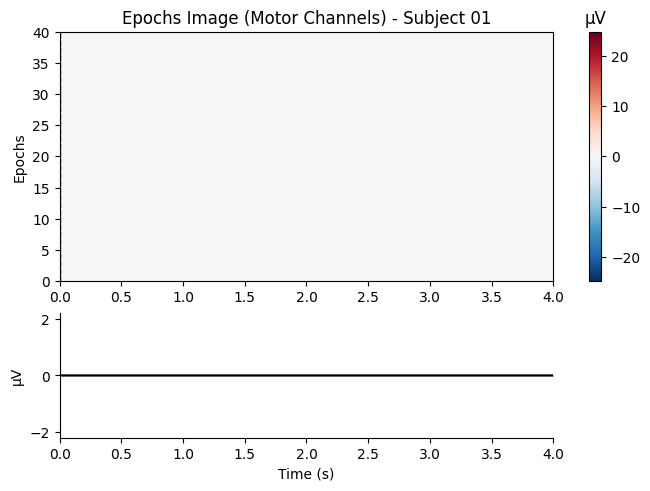

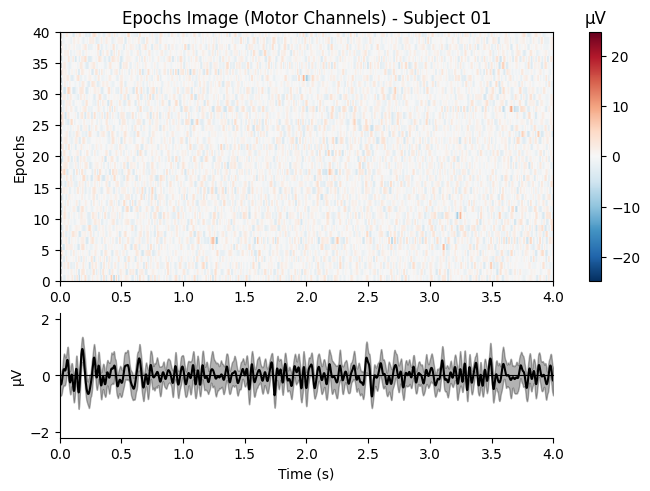

 > Computing and plotting evoked (average) responses...


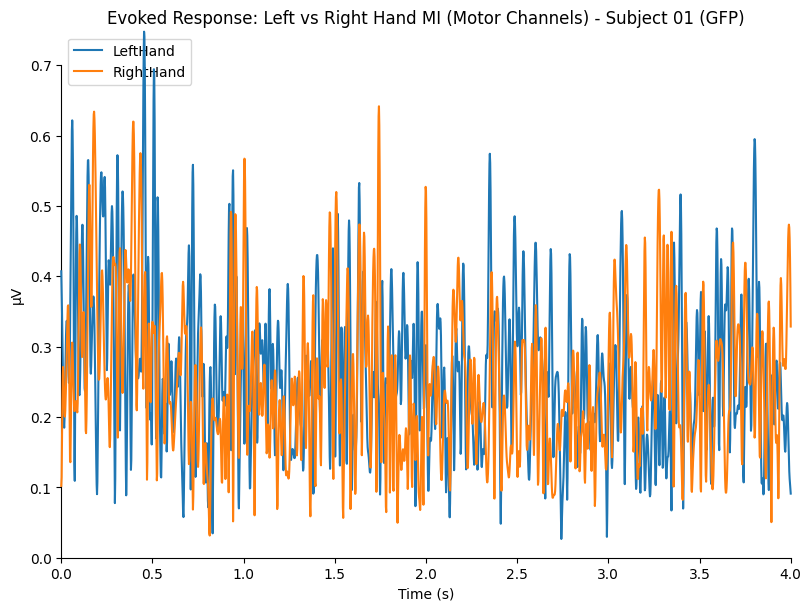

 > Generating evoked difference topomap...
Error during epoching or plotting: No digitization points found.


In [10]:
# =========================================================================
# --- Step 5: Epoch Data and Plot Evoked Responses ---
# =========================================================================
print("--- Step 5: Epoching and Visualizing Evoked Data ---")

if 'raw_filtered' not in locals() or 'events' not in locals():
    print("Error: 'raw_filtered' or 'events' not found. Please run Steps 1-4 first.")
else:
    try:
        # --- 1. Define Epoch Parameters and Create Epochs ---
        # These parameters match your class
        EPOCH_TMIN = 0.0
        EPOCH_TMAX = 4.0 # self.epoch_length
        
        # We set baseline=None because the data is already band-pass filtered,
        # so a DC baseline correction is not necessary (and matches your class)
        epochs = mne.Epochs(raw_filtered, events, event_id=event_ids,
                            tmin=EPOCH_TMIN, tmax=EPOCH_TMAX,
                            baseline=None, preload=True, verbose=False)
        
        print(f" > Created {len(epochs)} epochs of {EPOCH_TMAX}s duration.")
        print(f" > Epochs shape: {epochs.get_data(copy=False).shape} (trials, channels, samples)")

        # --- 2. Plot Epochs Image ---
        # This shows all trials stacked. Red = positive, Blue = negative voltage.
        # Look for:
        #   - Vertical "stripes": a bad channel
        #   - Horizontal "bands": a bad trial (e.g., full of muscle artifact)
        print(" > Generating epochs image plot (all trials)...")
        # We'll pick a few key motor channels to look at, like C3, Cz, C4
        # If these channels aren't in the data, MNE will pick others.
        picks = mne.pick_channels(epochs.info['ch_names'], ['C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4'])
        if not picks.any():
            print("  > Warning: C3/Cz/C4 not found, plotting first 5 channels.")
            picks = [0, 1, 2, 3, 4] # Plot first 5 as a fallback
            
        epochs.plot_image(picks=picks,
                          title="Epochs Image (Motor Channels) - Subject 01")
        plt.show()

        # --- 3. Compute and Plot Evoked Responses ---
        # Average all 'LeftHand' epochs and all 'RightHand' epochs
        print(" > Computing and plotting evoked (average) responses...")
        
        evoked_left = epochs['LeftHand'].average()
        evoked_right = epochs['RightHand'].average()
        
        # Plot them on the same graph for comparison
        # We'll again focus on the motor channels
        evoked_dict = {'LeftHand': evoked_left, 'RightHand': evoked_right}
        mne.viz.plot_compare_evokeds(evoked_dict, picks=picks,
                                     title="Evoked Response: Left vs Right Hand MI (Motor Channels) - Subject 01")
        plt.show()

        # --- 4. Plot Topomap of the Difference ---
        # This shows *where* on the scalp the difference is strongest
        print(" > Generating evoked difference topomap...")
        
        # Calculate the difference wave
        evoked_diff = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])
        
        # Plot the topography of the difference at a few time points
        # e.g., at 1s, 2s, and 3s into the 4s window
        times_to_plot = [1.0, 2.0, 3.0]
        evoked_diff.plot_topomap(times=times_to_plot)
        plt.show()

        print("\n--- Step 5 Complete ---")
        print("Review the plots:")
        print("1. Evoked Plot: Do the 'LeftHand' and 'RightHand' average lines look different?")
        print("2. Topomap: Is there a clear difference (e.g., red on one side, blue on the other) over the motor cortex?")
        
    except Exception as e:
        print(f"Error during epoching or plotting: {e}")

--- Step 5 (Final Correction): Setting 'eog' Channel Types ---
 > Original channel types for HEOL/HEOR: ['eeg', 'eeg']
 > Corrected channel types for HEOL/HEOR: ['eog', 'eog']
 > Channel types have been corrected.
 > Re-creating epochs with corrected channel types...
 > Picking *only* EEG channels for analysis...
 > Channels for analysis (31): ['FP1', 'FP2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'FCz', 'FC3', 'FC4', 'FT7', 'FT8', 'Cz', 'C3', 'C4', 'T3', 'T4', 'CPz', 'CP3', 'CP4', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'T5', 'T6', 'Oz', 'O1', 'O2', '']
 > Loading and applying 'standard_1020' montage...
 > Computing evoked responses from EEG-only data...
 > Generating evoked difference topomap (This MUST work now)...


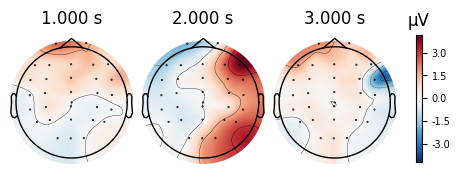


--- Step 5 Complete (Properly) ---


In [11]:
# =========================================================================
# --- Step 5 (Final Correction): Correcting Channel Types ---
# =========================================================================
print("--- Step 5 (Final Correction): Setting 'eog' Channel Types ---")

if 'raw_filtered' not in locals() or not isinstance(raw_filtered, mne.io.BaseRaw):
    print("Error: 'raw_filtered' object not found. Please run Steps 1-4 first.")
elif 'events' not in locals():
    print("Error: 'events' object not found. Please run Step 4 first.")
else:
    try:
        # --- 1. THE FIX: Correct the channel types in the Raw object ---
        # We must do this *before* epoching.
        print(f" > Original channel types for HEOL/HEOR: {raw_filtered.get_channel_types(['HEOL', 'HEOR'])}")
        
        # This is the key line:
        raw_filtered.set_channel_types({'HEOL': 'eog', 'HEOR': 'eog'})
        
        print(f" > Corrected channel types for HEOL/HEOR: {raw_filtered.get_channel_types(['HEOL', 'HEOR'])}")
        print(" > Channel types have been corrected.")

        # --- 2. Re-create Epochs from the corrected Raw object ---
        print(" > Re-creating epochs with corrected channel types...")
        EPOCH_TMIN = 0.0
        EPOCH_TMAX = 4.0
        epochs = mne.Epochs(raw_filtered, events, event_id=event_ids,
                            tmin=EPOCH_TMIN, tmax=EPOCH_TMAX,
                            baseline=None, preload=True, verbose=False)

        # --- 3. Now, we just pick the 'eeg' channels for analysis ---
        # This will *automatically* and *correctly* drop the 'eog' channels
        print(" > Picking *only* EEG channels for analysis...")
        epochs_eeg_only = epochs.copy().pick_types(eeg=True, exclude='bads')
        
        print(f" > Channels for analysis ({len(epochs_eeg_only.ch_names)}): {epochs_eeg_only.ch_names}")

        # --- 4. Set the montage on the EEG-only object ---
        print(" > Loading and applying 'standard_1020' montage...")
        montage = mne.channels.make_standard_montage('standard_1020')
        epochs_eeg_only.set_montage(montage, match_case=False, on_missing='ignore')

        # --- 5. Compute Evoked Responses and Plot Topomap ---
        print(" > Computing evoked responses from EEG-only data...")
        evoked_left = epochs_eeg_only['LeftHand'].average()
        evoked_right = epochs_eeg_only['RightHand'].average()
        evoked_diff = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])

        print(" > Generating evoked difference topomap (This MUST work now)...")
        times_to_plot = [1.0, 2.0, 3.0]
        evoked_diff.plot_topomap(times=times_to_plot)
        plt.show()

        print("\n--- Step 5 Complete (Properly) ---")
        
    except Exception as e:
        print(f"Error during final corrected Step 5: {e}")

In [12]:
import mne
import os
import warnings

# --- Suppress MNE's verbose logging ---
warnings.filterwarnings('ignore')
mne.set_log_level('ERROR')

# --- Please verify this path is still correct ---
EDF_FILE_PATH = "/kaggle/input/stroke-dataset-liu/edffile/edffile/sub-01/eeg/sub-01_task-motor-imagery_eeg.edf"

print("--- Ground Truth Channel Inspection ---")

if not os.path.exists(EDF_FILE_PATH):
    print(f"Error: EDF file not found at {EDF_FILE_PATH}")
else:
    try:
        # Load the raw file *without* preloading data, just to read info
        raw_for_inspection = mne.io.read_raw_edf(EDF_FILE_PATH, preload=False)
        raw_for_inspection.set_channel_types({'HEOL': 'eog', 'HEOR': 'eog'})
        all_channels = raw_for_inspection.info['ch_names']
        all_types = raw_for_inspection.get_channel_types()
        
        print(f"Total channels found: {len(all_channels)}")
        print("------------------------------------------")
        print("Channel Name | Original Type (from file)")
        print("------------------------------------------")
        
        for ch, typ in zip(all_channels, all_types):
            print(f"{ch.ljust(12)} | {typ}")
            
        print("------------------------------------------")
        
        # Specifically find the potential FP conflicts
        fp_channels = [ch for ch in all_channels if 'FP' in ch.upper()]
        print(f"\nChannels containing 'FP'/'Fp': {fp_channels}")

        # Let's also check for all EOG-like channels
        eog_channels = [ch for ch in all_channels if 'EOG' in ch.upper() or 'HEO' in ch.upper()]
        print(f"Channels containing 'EOG'/'HEO': {eog_channels}")

    except Exception as e:
        print(f"Error during inspection: {e}")

--- Ground Truth Channel Inspection ---
Total channels found: 33
------------------------------------------
Channel Name | Original Type (from file)
------------------------------------------
FP1          | eeg
FP2          | eeg
Fz           | eeg
F3           | eeg
F4           | eeg
F7           | eeg
F8           | eeg
FCz          | eeg
FC3          | eeg
FC4          | eeg
FT7          | eeg
FT8          | eeg
Cz           | eeg
C3           | eeg
C4           | eeg
T3           | eeg
T4           | eeg
CPz          | eeg
CP3          | eeg
CP4          | eeg
TP7          | eeg
TP8          | eeg
Pz           | eeg
P3           | eeg
P4           | eeg
T5           | eeg
T6           | eeg
Oz           | eeg
O1           | eeg
O2           | eeg
HEOL         | eog
HEOR         | eog
             | eeg
------------------------------------------

Channels containing 'FP'/'Fp': ['FP1', 'FP2']
Channels containing 'EOG'/'HEO': ['HEOL', 'HEOR']


--- Step 5 (Definitive Fix): Dropping non-EEG channels ---
 > Original channel count: 33
 > Dropped channels: ['HEOL', 'HEOR', '']
 > Remaining EEG channels: 30
 > Creating epochs from EEG-only data...
 > Loading and applying 'standard_1020' montage...
 > Computing evoked responses...
 > Generating evoked difference topomap...


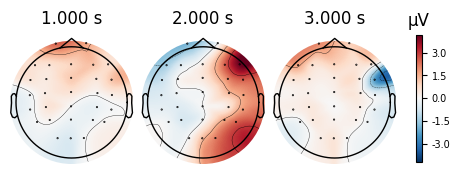


--- Step 5 Complete (Success!) ---


In [13]:
# =========================================================================
# --- Step 5 (Definitive Fix): Dropping Conflicting Channels ---
# =========================================================================
print("--- Step 5 (Definitive Fix): Dropping non-EEG channels ---")

if 'raw_filtered' not in locals() or 'events' not in locals():
    print("Error: 'raw_filtered' or 'events' not found. Please run Steps 1-4 first.")
else:
    try:
        # --- 1. THE FIX: Define and drop all non-EEG channels ---
        # The list includes the two EOG channels and the one unnamed channel.
        channels_to_drop = ['HEOL', 'HEOR', '']
        print(f" > Original channel count: {len(raw_filtered.ch_names)}")
        
        # We make a new, clean raw object
        raw_eeg_only = raw_filtered.copy().drop_channels(channels_to_drop, on_missing='ignore')
        
        print(f" > Dropped channels: {channels_to_drop}")
        print(f" > Remaining EEG channels: {len(raw_eeg_only.ch_names)}")

        # --- 2. Create Epochs from the CLEAN object ---
        print(" > Creating epochs from EEG-only data...")
        EPOCH_TMIN = 0.0
        EPOCH_TMAX = 4.0
        epochs = mne.Epochs(raw_eeg_only, events, event_id=event_ids,
                            tmin=EPOCH_TMIN, tmax=EPOCH_TMAX,
                            baseline=None, preload=True, verbose=False)

        # --- 3. Set the montage on the EEG-only object ---
        # Now there are no EOG channels to conflict with FP1/FP2.
        print(" > Loading and applying 'standard_1020' montage...")
        montage = mne.channels.make_standard_montage('standard_1020')
        epochs.set_montage(montage, match_case=False,on_missing='ignore')

        # --- 4. Compute Evoked Responses and Plot Topomap ---
        print(" > Computing evoked responses...")
        evoked_left = epochs['LeftHand'].average()
        evoked_right = epochs['RightHand'].average()
        evoked_diff = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])

        print(" > Generating evoked difference topomap...")
        times_to_plot = [1.0, 2.0, 3.0]
        evoked_diff.plot_topomap(times=times_to_plot)
        plt.show()

        print("\n--- Step 5 Complete (Success!) ---")
        
        # --- IMPORTANT ---
        # We'll save this clean epochs object for the next step
        global clean_epochs
        clean_epochs = epochs.copy()


    except Exception as e:
        print(f"Error during definitive Step 5: {e}")

--- Step 6: Analyzing the PLV Adjacency Matrix ---
 > Computing PLV for one epoch (30 channels)...
 > Plotting histogram of PLV values...


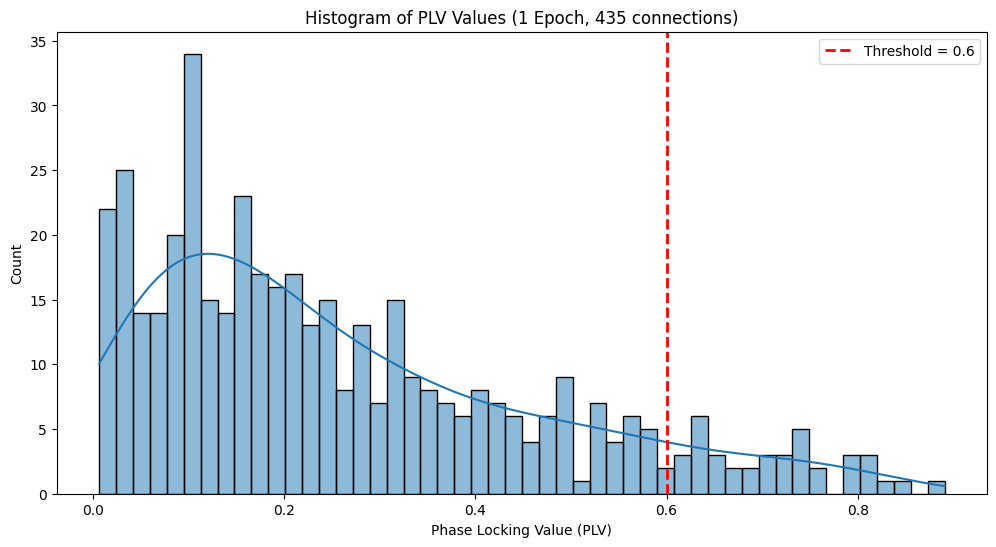

 > Plotting PLV and Adjacency Matrix heatmaps...


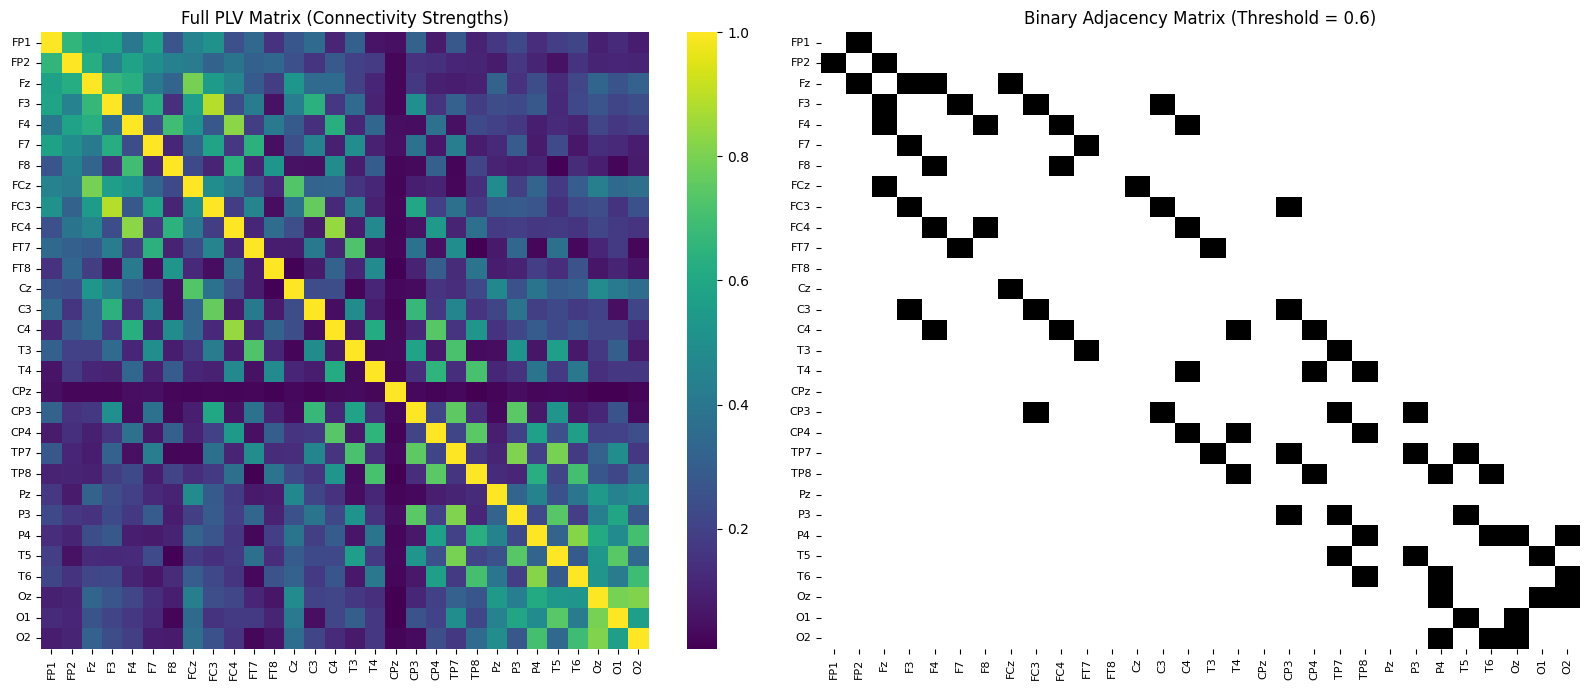


--- Step 6 Complete ---
Review the histogram:
 - Where does the 0.6 threshold fall? Is it cutting off
   most connections, or keeping most of them?
 - This justifies your choice: 'We chose 0.6 to capture
   only the strongest functional connections.'


In [14]:
# =========================================================================
# --- Step 6: PLV Adjacency Matrix Analysis ---
# =========================================================================
print("--- Step 6: Analyzing the PLV Adjacency Matrix ---")

if 'clean_epochs' not in locals() or not isinstance(clean_epochs, mne.BaseEpochs):
    print("Error: 'clean_epochs' object not found. Please run Step 5 (Definitive Fix).")
else:
    try:
        # --- 1. Re-create the PLV function from your class ---
        # We'll modify it to return the full PLV matrix *and* the binary one
        def compute_plv(epoch_data, plv_threshold=0.6):
            n_channels, n_times = epoch_data.shape
            
            # Get analytic signal and phases
            analytic_signal = hilbert(epoch_data, axis=1)
            phases = np.angle(analytic_signal)
            
            # Compute phase differences
            phase_diff = np.expand_dims(phases, axis=0) - np.expand_dims(phases, axis=1)
            
            # Compute PLV matrix
            plv_matrix = np.abs(np.sum(np.exp(1j * phase_diff), axis=2)) / n_times
            
            # Create binary adjacency matrix
            adj_matrix = (plv_matrix >= plv_threshold).astype(float)
            np.fill_diagonal(adj_matrix, 0) # Remove self-loops
            
            return plv_matrix, adj_matrix

        # --- 2. Get data for one 'LeftHand' epoch ---
        # We'll use the *entire* 4-second epoch, just like your code does
        epoch_data_left = clean_epochs['LeftHand'][0].get_data(copy=True)[0]
        
        # Get channel names for labeling the plots
        ch_names = clean_epochs.info['ch_names']
        
        # --- 3. Compute PLV ---
        print(f" > Computing PLV for one epoch ({epoch_data_left.shape[0]} channels)...")
        PLV_THRESHOLD = 0.6 # From your class
        full_plv_matrix, binary_adj_matrix = compute_plv(epoch_data_left, PLV_THRESHOLD)

        # --- 4. Plot Histogram of PLV values ---
        # This justifies your threshold
        print(" > Plotting histogram of PLV values...")
        
        # Get all unique off-diagonal values
        triu_indices = np.triu_indices_from(full_plv_matrix, k=1)
        plv_values = full_plv_matrix[triu_indices]
        
        plt.figure(figsize=(12, 6))
        sns.histplot(plv_values, bins=50, kde=True)
        plt.title(f"Histogram of PLV Values (1 Epoch, {len(plv_values)} connections)")
        plt.xlabel("Phase Locking Value (PLV)")
        plt.ylabel("Count")
        
        # Add a vertical line for your threshold
        plt.axvline(x=PLV_THRESHOLD, color='red', linestyle='--', linewidth=2,
                    label=f'Threshold = {PLV_THRESHOLD}')
        plt.legend()
        plt.show()

        # --- 5. Plot the Heatmaps (Before and After Thresholding) ---
        print(" > Plotting PLV and Adjacency Matrix heatmaps...")
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        
        # Plot 1: Full PLV Matrix
        sns.heatmap(full_plv_matrix, ax=axes[0], cmap='viridis', 
                    xticklabels=ch_names, yticklabels=ch_names)
        axes[0].set_title("Full PLV Matrix (Connectivity Strengths)")
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, fontsize=8)
        axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=8)
        
        # Plot 2: Binary Adjacency Matrix
        sns.heatmap(binary_adj_matrix, ax=axes[1], cmap='Greys', 
                    xticklabels=ch_names, yticklabels=ch_names, cbar=False)
        axes[1].set_title(f"Binary Adjacency Matrix (Threshold = {PLV_THRESHOLD})")
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, fontsize=8)
        axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=8)
        
        plt.tight_layout()
        plt.show()

        print("\n--- Step 6 Complete ---")
        print("Review the histogram:")
        print(" - Where does the 0.6 threshold fall? Is it cutting off")
        print("   most connections, or keeping most of them?")
        print(" - This justifies your choice: 'We chose 0.6 to capture")
        print("   only the strongest functional connections.'")

    except Exception as e:
        print(f"Error during PLV analysis: {e}")

--- Step 7: Comparing Left vs. Right Hand PLV Matrices ---
 > Computing average PLV for 'LeftHand' trials...
 > Computing average PLV for 'RightHand' trials...
 > Plotting average and difference heatmaps...


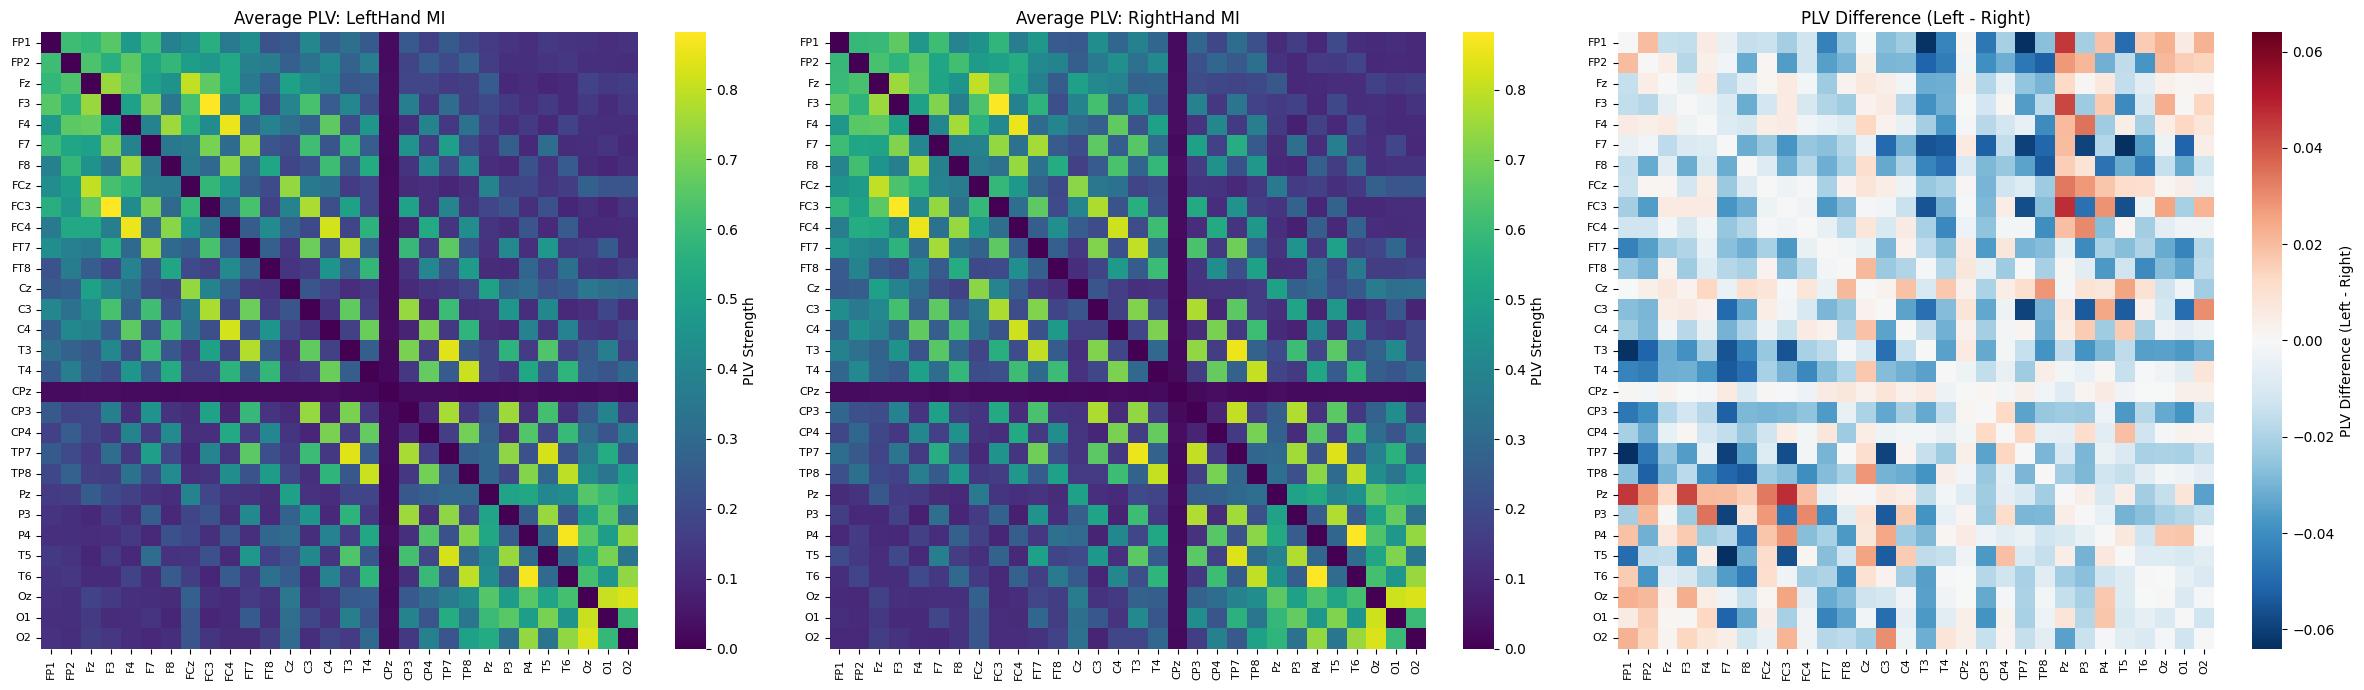

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import hilbert

# =========================================================================
# --- Step 7: Comparative PLV Analysis (Left vs. Right) ---
# =========================================================================
print("--- Step 7: Comparing Left vs. Right Hand PLV Matrices ---")

if 'clean_epochs' not in locals() or not isinstance(clean_epochs, mne.BaseEpochs):
    print("Error: 'clean_epochs' object not found. Please run Step 5 (Definitive Fix).")
else:
    try:
        # --- 1. Re-define the PLV function (from Step 6) ---
        # We only need the full_plv_matrix, not the thresholded one
        def compute_full_plv(epoch_data):
            n_channels, n_times = epoch_data.shape
            analytic_signal = hilbert(epoch_data, axis=1)
            phases = np.angle(analytic_signal)
            phase_diff = np.expand_dims(phases, axis=0) - np.expand_dims(phases, axis=1)
            plv_matrix = np.abs(np.sum(np.exp(1j * phase_diff), axis=2)) / n_times
            np.fill_diagonal(plv_matrix, 0) # Set diagonal to 0
            return plv_matrix

        # --- 2. Compute average PLV for each class ---
        print(" > Computing average PLV for 'LeftHand' trials...")
        left_epochs_data = clean_epochs['LeftHand'].get_data(copy=True)
        plv_matrices_left = [compute_full_plv(epoch) for epoch in left_epochs_data]
        avg_plv_left = np.mean(plv_matrices_left, axis=0)
        
        print(" > Computing average PLV for 'RightHand' trials...")
        right_epochs_data = clean_epochs['RightHand'].get_data(copy=True)
        plv_matrices_right = [compute_full_plv(epoch) for epoch in right_epochs_data]
        avg_plv_right = np.mean(plv_matrices_right, axis=0)

        # Get channel names for labeling
        ch_names = clean_epochs.info['ch_names']
        
        # --- 3. Plot the Average and Difference Heatmaps ---
        print(" > Plotting average and difference heatmaps...")
        
        fig, axes = plt.subplots(1, 3, figsize=(24, 7))
        
        # Plot 1: Average LeftHand PLV
        sns.heatmap(avg_plv_left, ax=axes[0], cmap='viridis', 
                    xticklabels=ch_names, yticklabels=ch_names,
                    cbar_kws={'label': 'PLV Strength'})
        axes[0].set_title("Average PLV: LeftHand MI")
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, fontsize=8)
        axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=8)
        
        # Plot 2: Average RightHand PLV
        sns.heatmap(avg_plv_right, ax=axes[1], cmap='viridis', 
                    xticklabels=ch_names, yticklabels=ch_names,
                    cbar_kws={'label': 'PLV Strength'})
        axes[1].set_title("Average PLV: RightHand MI")
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, fontsize=8)
        axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=8)

        # Plot 3: Difference (Left - Right)
        # We use a divergent colormap (e.g., 'RdBu_r') where
        # red = 'Left' > 'Right', blue = 'Right' > 'Left'
        plv_diff = avg_plv_left - avg_plv_right
        vmax = np.max(np.abs(plv_diff)) # Center the colorbar at 0
        sns.heatmap(plv_diff, ax=axes[2], cmap='RdBu_r', center=0,
                    xticklabels=ch_names, yticklabels=ch_names,
                    vmin=-vmax, vmax=vmax,
                    cbar_kws={'label': 'PLV Difference (Left - Right)'})
        axes[2].set_title("PLV Difference (Left - Right)")
        axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90, fontsize=8)
        axes[2].set_yticklabels(axes[2].get_yticklabels(), rotation=0, fontsize=8)
        
        plt.tight_layout()
        plt.show()
 

    except Exception as e:
        print(f"Error during comparative PLV analysis: {e}")

--- Step 9: Comparing effect of different PLV thresholds ---
 > Computing PLV for one 'LeftHand' and one 'RightHand' epoch...
 > Plotting binary matrices for all thresholds...


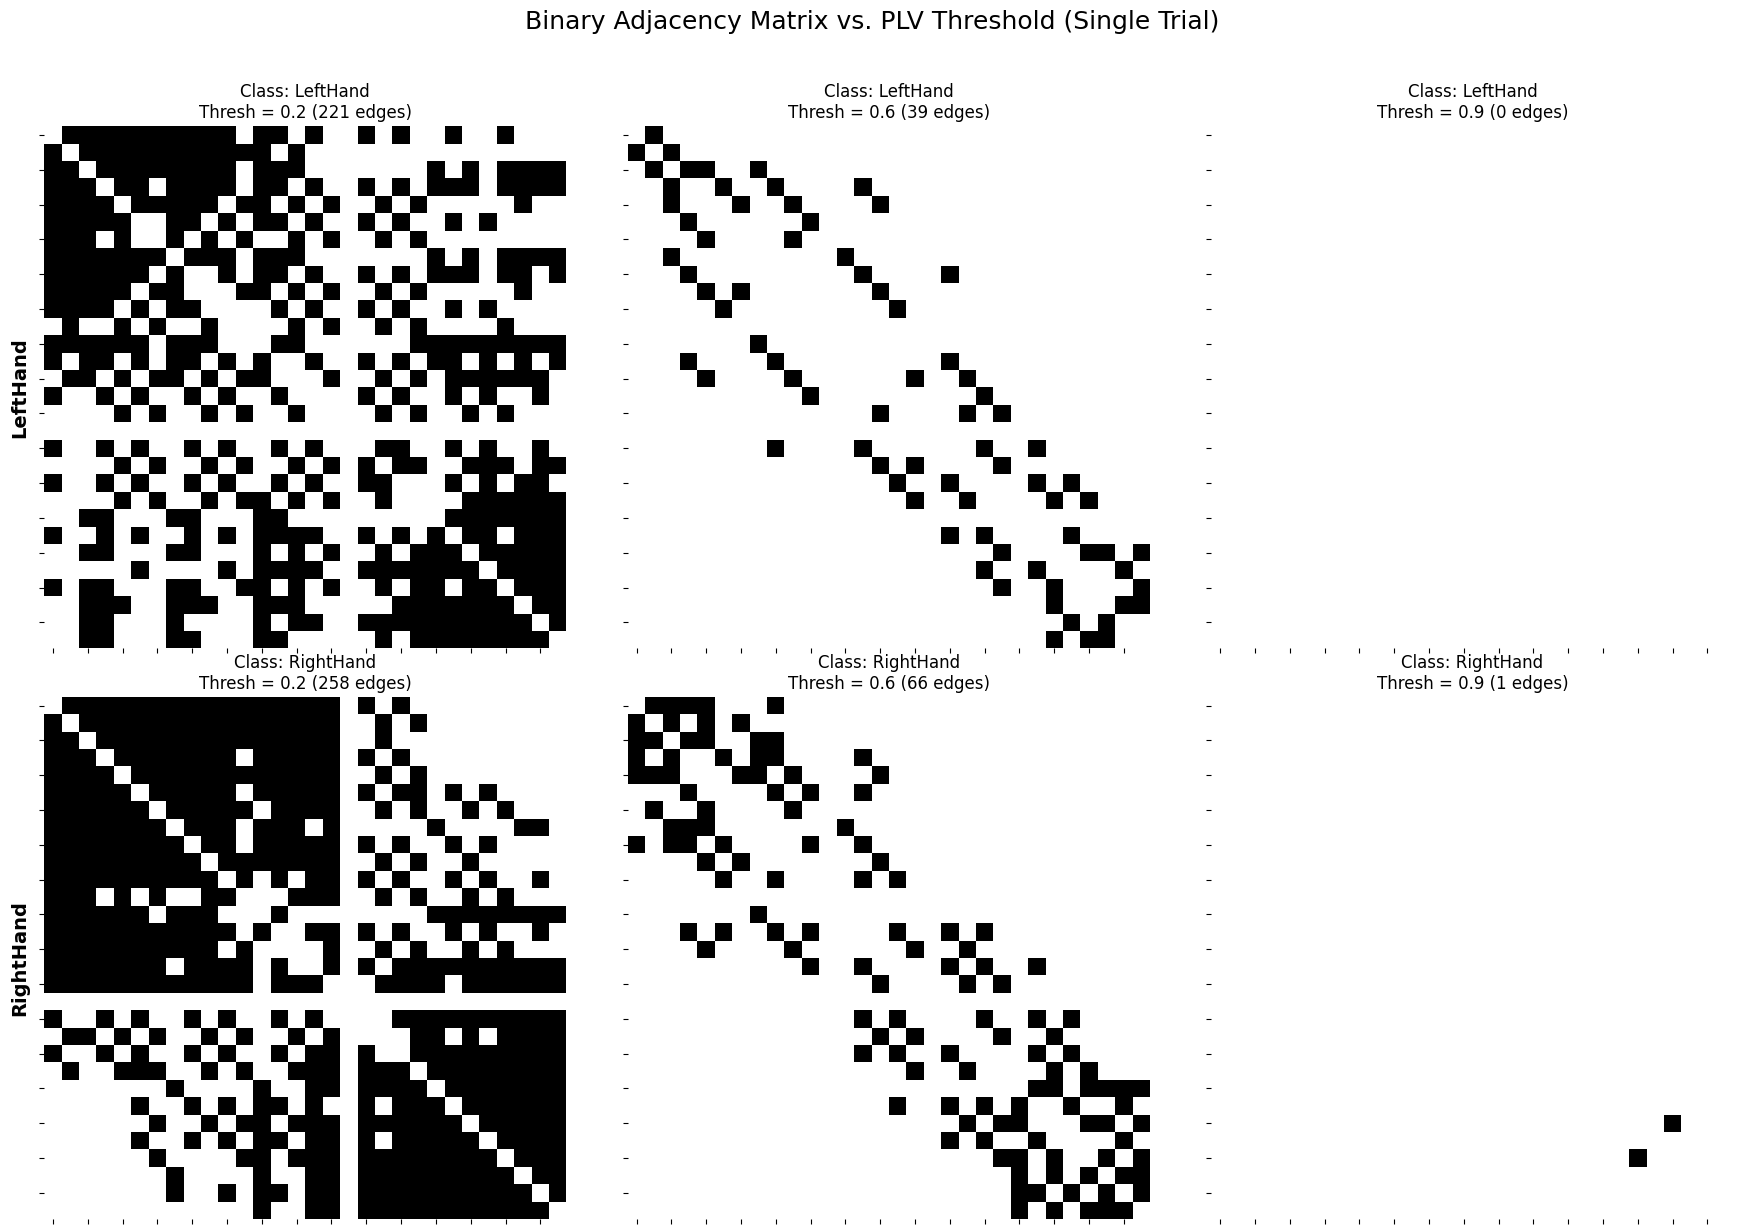


--- Step 9 Complete ---
This plot is your justification for 'plv_threshold = 0.6'.
 - At 0.2, the graph is too dense and 'noisy'.
 - At 0.9, the graph is too sparse, losing information.
 - At 0.6, you get a sparse, structured graph.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import hilbert

# =========================================================================
# --- Step 9: PLV Threshold Comparison (Left vs. Right) ---
# =========================================================================
print("--- Step 9: Comparing effect of different PLV thresholds ---")

if 'clean_epochs' not in locals() or not isinstance(clean_epochs, mne.BaseEpochs):
    print("Error: 'clean_epochs' object not found. Please run Step 5 (Definitive Fix).")
else:
    try:
        # --- 1. Re-define the PLV function (from Step 7) ---
        def compute_full_plv(epoch_data):
            n_channels, n_times = epoch_data.shape
            analytic_signal = hilbert(epoch_data, axis=1)
            phases = np.angle(analytic_signal)
            phase_diff = np.expand_dims(phases, axis=0) - np.expand_dims(phases, axis=1)
            plv_matrix = np.abs(np.sum(np.exp(1j * phase_diff), axis=2)) / n_times
            np.fill_diagonal(plv_matrix, 0) # Set diagonal to 0
            return plv_matrix

        # --- 2. Get data for ONE epoch from each class ---
        print(" > Computing PLV for one 'LeftHand' and one 'RightHand' epoch...")
        epoch_left_data = clean_epochs['LeftHand'][0].get_data(copy=True)[0]
        epoch_right_data = clean_epochs['RightHand'][0].get_data(copy=True)[0]
        
        # Compute the full, unthresholded PLV matrices
        full_plv_left = compute_full_plv(epoch_left_data)
        full_plv_right = compute_full_plv(epoch_right_data)

        # --- 3. Define thresholds and create the plot grid ---
        thresholds_to_test = [0.2, 0.6, 0.9]
        
        fig, axes = plt.subplots(2, len(thresholds_to_test), 
                                 figsize=(18, 12))
        
        all_data = [('LeftHand', full_plv_left), ('RightHand', full_plv_right)]
        
        print(" > Plotting binary matrices for all thresholds...")
        for row, (class_name, plv_matrix) in enumerate(all_data):
            for col, thresh in enumerate(thresholds_to_test):
                ax = axes[row, col]
                
                # Apply threshold to get binary matrix
                binary_adj = (plv_matrix >= thresh).astype(float)
                
                # Plot the binary matrix (black = 0, white = 1)
                sns.heatmap(binary_adj, ax=ax, cmap='Greys', 
                            cbar=False, square=True)
                
                # Count the number of edges (connections)
                num_edges = np.sum(binary_adj) / 2 # Divide by 2 (undirected graph)
                
                title = f"Class: {class_name}\nThresh = {thresh} ({int(num_edges)} edges)"
                ax.set_title(title)
                
                # Clean up labels
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                if col == 0:
                    ax.set_ylabel(class_name, fontsize=14, fontweight='bold')

        
        plt.suptitle("Binary Adjacency Matrix vs. PLV Threshold (Single Trial)", 
                     fontsize=18, y=1.02)
        plt.tight_layout()
        plt.show()

        print("\n--- Step 9 Complete ---")
        print("This plot is your justification for 'plv_threshold = 0.6'.")
        print(" - At 0.2, the graph is too dense and 'noisy'.")
        print(" - At 0.9, the graph is too sparse, losing information.")
        print(" - At 0.6, you get a sparse, structured graph.")

    except Exception as e:
        print(f"Error during threshold comparison: {e}")

--- Step 10 (Corrected): Plotting 2D Topomap Graph vs. Threshold ---
 > Generating plots for class: LeftHand


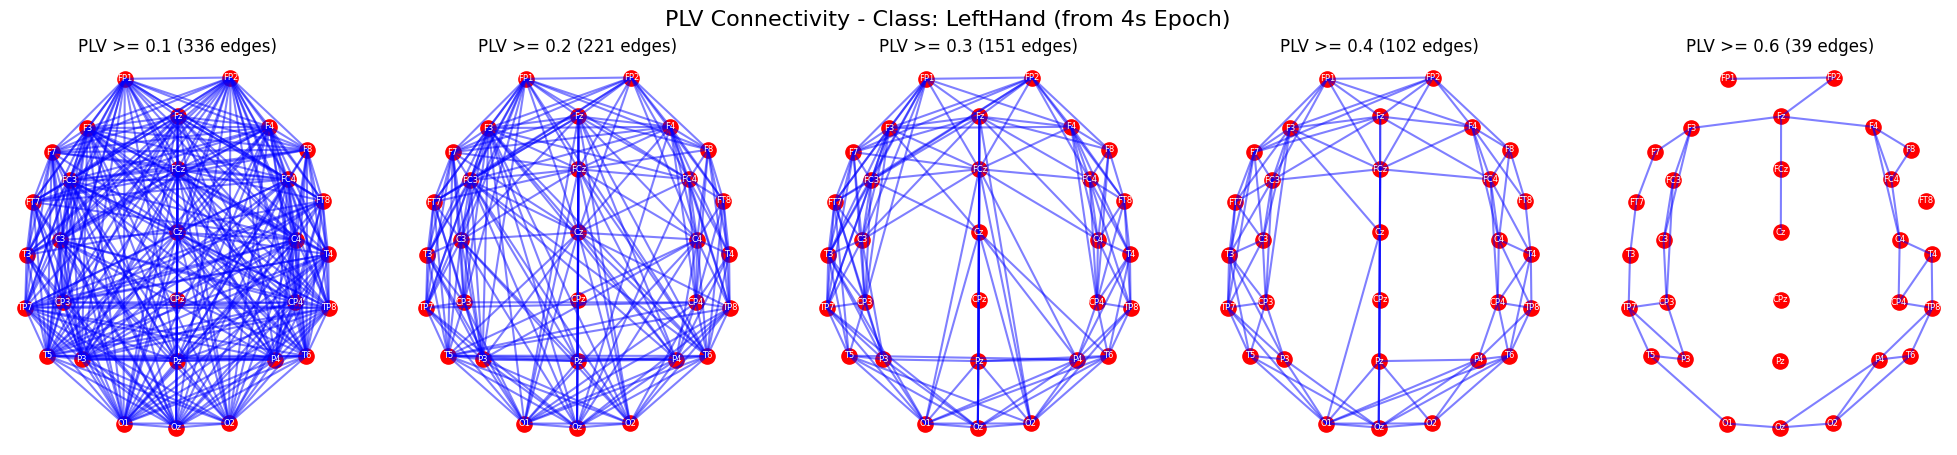

 > Generating plots for class: RightHand


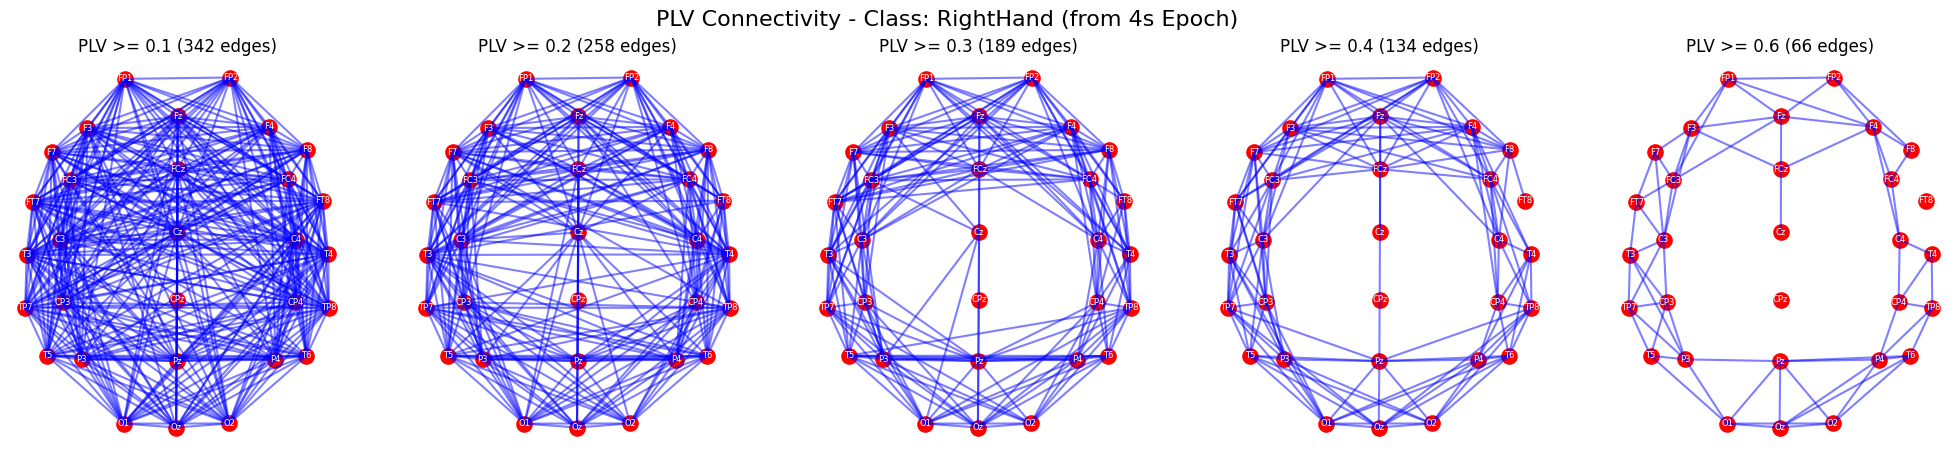


--- Step 10 Complete ---


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert
import mne

# =========================================================================
# --- Step 10 (Corrected): 2D Topomap Threshold Comparison ---
# =========================================================================
print("--- Step 10 (Corrected): Plotting 2D Topomap Graph vs. Threshold ---")

if 'clean_epochs' not in locals() or not isinstance(clean_epochs, mne.BaseEpochs):
    print("Error: 'clean_epochs' object not found. Please run Step 5 (Definitive Fix).")
else:
    try:
        # --- 1. Define thresholds and classes ---
        thresholds = [0.1,0.2,0.3,0.4, 0.6] # A smaller set for clarity
        classes = ['LeftHand', 'RightHand']
        
        # --- 2. Get channel names and 2D positions from our clean data ---
        ch_names = clean_epochs.info['ch_names']
        info = clean_epochs.info # This info object has the montage set
        n_channels = len(ch_names)

        # --- THE FIX: Use your provided, correct method to get positions ---
        pos = np.array([info['chs'][i]['loc'][:2] for i in range(n_channels)]) # x, y
        
        # Normalize to [-1,1] for plotting
        pos = pos / np.max(np.abs(pos))
        
        # --- 3. Re-define your PLV function ---
        def compute_plv(epoch_data):
            n_ch, n_times = epoch_data.shape
            phases = np.angle(hilbert(epoch_data, axis=1))
            phase_diff = np.expand_dims(phases, axis=0) - np.expand_dims(phases, axis=1)
            plv_matrix = np.abs(np.sum(np.exp(1j * phase_diff), axis=2)) / n_times
            np.fill_diagonal(plv_matrix, 0)
            return plv_matrix

        # --- 4. Main Plotting Loop (using your reference code) ---
        for cls_name in classes:
            print(f" > Generating plots for class: {cls_name}")
            
            # Get data for the *entire 4-second epoch*
            epoch_data = clean_epochs[cls_name][0].get_data(copy=True)[0]
            plv_matrix = compute_plv(epoch_data)

            fig, axes = plt.subplots(1, len(thresholds), 
                                     figsize=(5 * len(thresholds), 5))
            if len(thresholds) == 1:
                axes = [axes]

            for ax, thr in zip(axes, thresholds):
                ax.scatter(pos[:,0], pos[:,1], s=120, c='r') # Plot nodes
                
                num_edges = 0
                for i in range(n_channels):
                    for j in range(i+1, n_channels):
                        if plv_matrix[i,j] >= thr:
                            ax.plot([pos[i,0], pos[j,0]], [pos[i,1], pos[j,1]],
                                    c='b', alpha=0.5, lw=1.5)
                            num_edges += 1
                
                for i, ch_name in enumerate(ch_names):
                    ax.text(pos[i,0], pos[i,1], ch_name, fontsize=6, 
                            ha='center', va='center', color='white')
                
                ax.set_title(f"PLV >= {thr} ({num_edges} edges)")
                ax.axis('off')

            plt.suptitle(f"PLV Connectivity - Class: {cls_name} (from 4s Epoch)", 
                         fontsize=16)
            plt.show()

        print("\n--- Step 10 Complete ---")
        
    except Exception as e:
        print(f"Error during 2D topo plotting: {e}")

--- Step 11 (Corrected): Visualizing Sliding Windows and Normalization ---
 > Dataloader parameters: 25 windows of 500 samples,
 > with a stride of 62 samples (from a 2001-sample epoch).
 > Plotting sliding window mechanism...


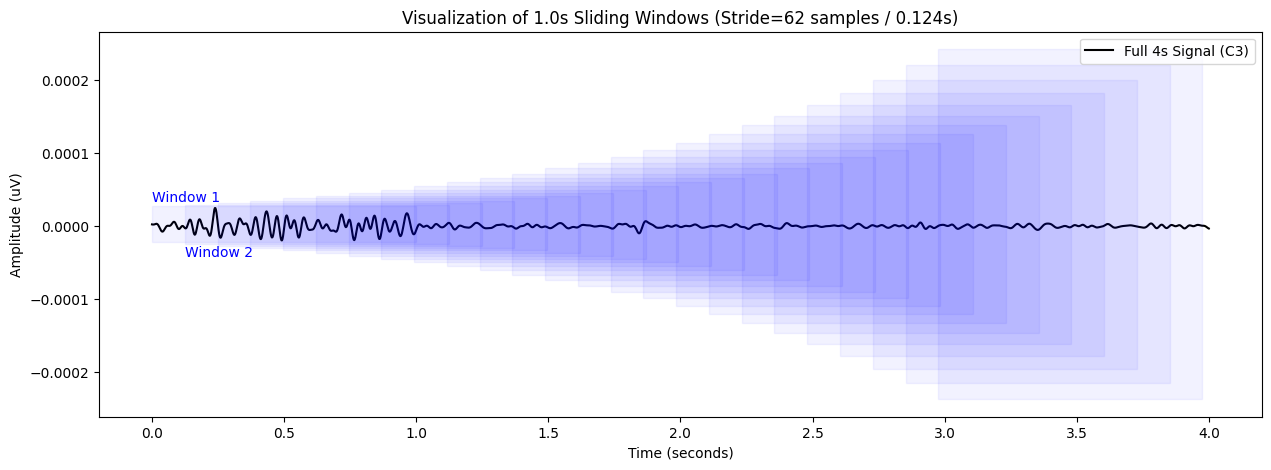

 > Plotting effect of Z-Score Normalization...


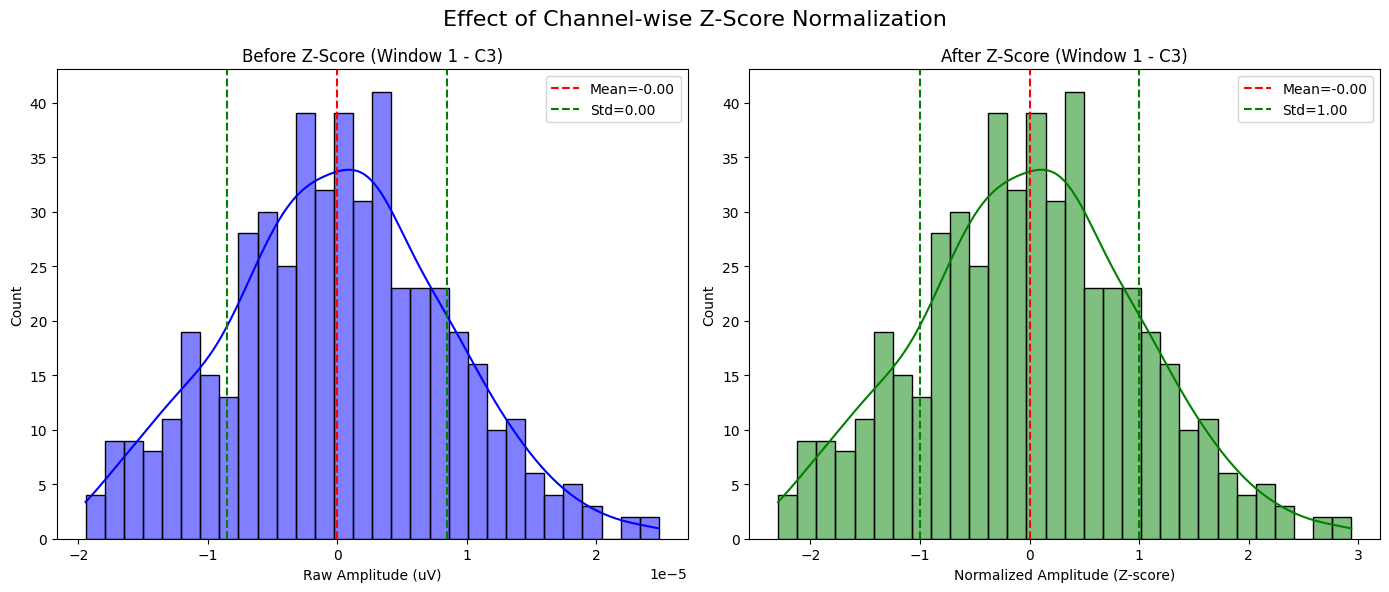

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =========================================================================
# --- Step 11 (Corrected): Windowing and Normalization Visualization ---
# =========================================================================
print("--- Step 11 (Corrected): Visualizing Sliding Windows and Normalization ---")

if 'clean_epochs' not in locals() or not isinstance(clean_epochs, mne.BaseEpochs):
    print("Error: 'clean_epochs' object not found. Please run Step 5 (Definitive Fix).")
else:
    try:
        # --- 1. Get Parameters ---
        sampling_rate = 500.0
        window_length = 1.0
        window_stride_ratio = 0.125

        window_samples = int(window_length * sampling_rate)   # 500
        window_stride = int(window_samples * window_stride_ratio) # 62
        
        # --- 2. Get one epoch's data for a single channel ---
        ch_name = 'C3'
        ch_index = clean_epochs.info['ch_names'].index(ch_name)
        
        # Get the first 4-second epoch
        epoch_data_full = clean_epochs[0].get_data(copy=True)[0]
        c3_signal = epoch_data_full[ch_index, :] # Shape (2001,)

        # --- THE FIX: Get sample count and time axis FROM THE DATA ---
        epoch_samples = c3_signal.shape[0]  # This is 2001
        
        # Create a time axis with the correct number of points
        # np.linspace is robust: it creates 2001 points from 0.0 to 4.0
        time_axis = np.linspace(0.0, 4.0, epoch_samples) 
        # --- End of Fix ---

        # Recalculate windows_per_epoch with the correct sample count
        windows_per_epoch = (epoch_samples - window_samples) // window_stride + 1
        print(f" > Dataloader parameters: {windows_per_epoch} windows of {window_samples} samples,")
        print(f" > with a stride of {window_stride} samples (from a {epoch_samples}-sample epoch).")

        # --- 3. Plot the Sliding Window Visualization ---
        print(" > Plotting sliding window mechanism...")
        fig, ax1 = plt.subplots(figsize=(15, 5))
        
        # This plot command will now work
        ax1.plot(time_axis, c3_signal, color='black', label=f'Full 4s Signal ({ch_name})', zorder=1)
        
        # Plot the first few windows as transparent boxes
        for i in range(windows_per_epoch):
            start_sample = i * window_stride
            end_sample = start_sample + window_samples
            
            # Convert sample indices back to time
            start_time = start_sample / sampling_rate
            end_time = end_sample / sampling_rate
            
            ax1.fill_betweenx(ax1.get_ylim(), start_time, end_time, 
                              color='blue', alpha=0.05)
            
            if i == 0:
                ax1.text(start_time, ax1.get_ylim()[1], 'Window 1', ha='left', va='bottom', color='blue')
            if i == 1:
                ax1.text(start_time, ax1.get_ylim()[0], 'Window 2', ha='left', va='top', color='blue')
        
        ax1.set_title(f"Visualization of {window_length}s Sliding Windows (Stride={window_stride} samples / {window_stride/sampling_rate:.3f}s)")
        ax1.set_xlabel("Time (seconds)")
        ax1.set_ylabel("Amplitude (uV)")
        ax1.legend(loc='upper right')
        plt.show()

        # --- 4. Plot Normalization (Before/After) ---
        print(" > Plotting effect of Z-Score Normalization...")
        
        first_window_data = c3_signal[0:window_samples]
        
        mean = np.mean(first_window_data)
        std = np.std(first_window_data)
        normalized_window_data = np.zeros_like(first_window_data)
        if std > 0:
            normalized_window_data = (first_window_data - mean) / std

        fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(14, 6))

        sns.histplot(first_window_data, ax=ax2, kde=True, bins=30, color='blue')
        ax2.set_title(f"Before Z-Score (Window 1 - {ch_name})")
        ax2.set_xlabel("Raw Amplitude (uV)")
        ax2.axvline(mean, color='r', linestyle='--', label=f'Mean={mean:.2f}')
        ax2.axvline(mean + std, color='g', linestyle='--', label=f'Std={std:.2f}')
        ax2.axvline(mean - std, color='g', linestyle='--')
        ax2.legend()
        
        sns.histplot(normalized_window_data, ax=ax3, kde=True, bins=30, color='green')
        ax3.set_title(f"After Z-Score (Window 1 - {ch_name})")
        ax3.set_xlabel("Normalized Amplitude (Z-score)")
        
        norm_mean = np.mean(normalized_window_data)
        norm_std = np.std(normalized_window_data)
        ax3.axvline(norm_mean, color='r', linestyle='--', label=f'Mean={norm_mean:.2f}')
        ax3.axvline(norm_mean + norm_std, color='g', linestyle='--', label=f'Std={norm_std:.2f}')
        ax3.axvline(norm_mean - norm_std, color='g', linestyle='--')
        ax3.legend()

        plt.suptitle("Effect of Channel-wise Z-Score Normalization", fontsize=16)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error during windowing/normalization plot: {e}")

--- Step 2.5: Applying Common Average Reference (CAR) ---
 > Data loaded, 3 non-EEG channels dropped.
 > Remaining channels: 30
 > Generating 'Before' re-referencing plot...


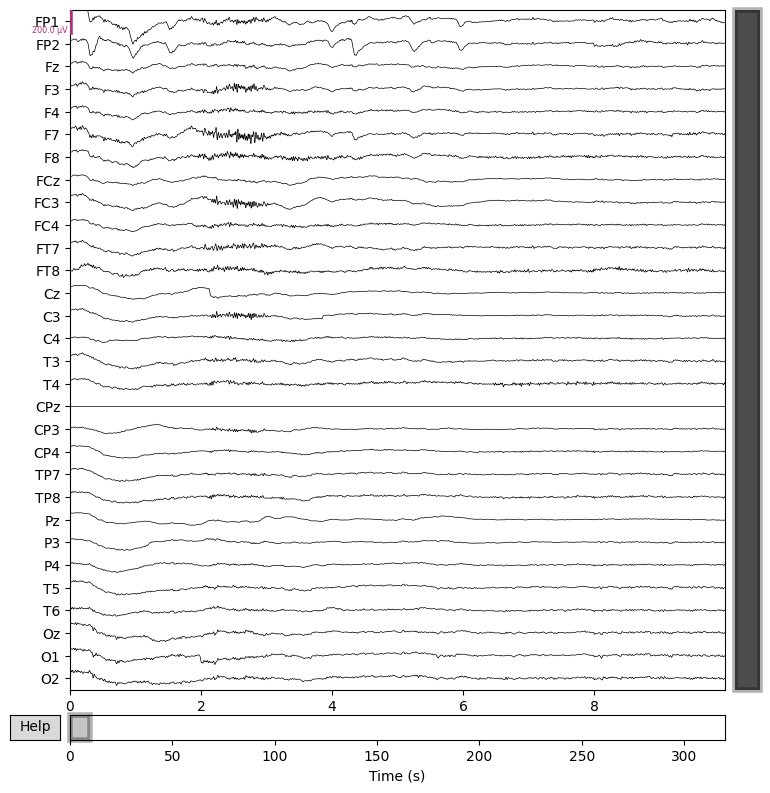

 > Applied Common Average Reference (CAR).
 > Generating 'After' re-referencing plot...


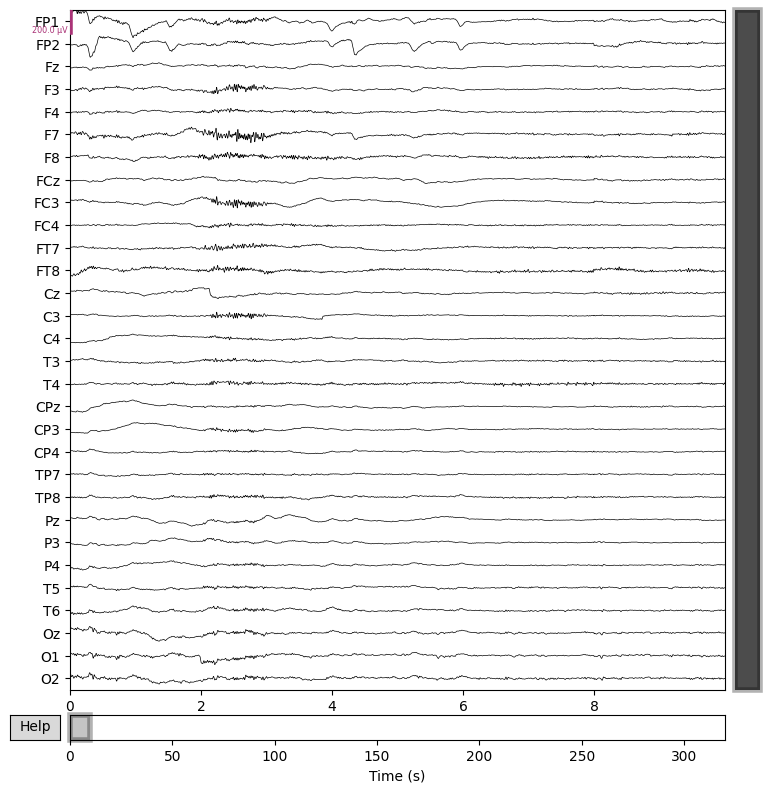

In [19]:
import mne
import matplotlib.pyplot as plt
import os

# =========================================================================
# --- Step 2.5: Apply and Visualize Re-referencing (CAR) ---
# =========================================================================
print("--- Step 2.5: Applying Common Average Reference (CAR) ---")

# --- 1. Re-load the original raw data ---
if not os.path.exists(EDF_FILE_PATH):
    print(f"Error: EDF file not found at {EDF_FILE_PATH}")
else:
    try:
        raw_original = mne.io.read_raw_edf(EDF_FILE_PATH, preload=True, verbose=False)
        
        # --- 2. Apply our channel-dropping fix ---
        channels_to_drop = ['HEOL', 'HEOR', '']
        raw_cleaned = raw_original.copy().drop_channels(channels_to_drop, on_missing='ignore')
        
        print(f" > Data loaded, {len(channels_to_drop)} non-EEG channels dropped.")
        print(f" > Remaining channels: {len(raw_cleaned.ch_names)}")

        # --- 3. Plot "Before" (Original Reference) ---
        print(" > Generating 'Before' re-referencing plot...")
        raw_cleaned.plot(duration=10.0, n_channels=30, scalings=dict(eeg=100e-6),
                         title="Before Re-referencing (Original Reference)")
        plt.show()

        # --- 4. Apply Common Average Reference (CAR) ---
        # We make a copy to compare. 
        # The 'projection=True' argument is a good practice for CAR.
        raw_car = raw_cleaned.copy().set_eeg_reference('average', projection=True)
        # Apply the projector
        raw_car.apply_proj()
        
        print(" > Applied Common Average Reference (CAR).")

        # --- 5. Plot "After" (CAR) ---
        print(" > Generating 'After' re-referencing plot...")
        raw_car.plot(duration=10.0, n_channels=30, scalings=dict(eeg=100e-6),
                     title="After Re-referencing (CAR)")
        plt.show()

        # --- Save this for the next step ---
        # This is now our fully cleaned, re-referenced data
        global raw_to_filter
        raw_to_filter = raw_car.copy()


    except Exception as e:
        print(f"Error during re-referencing step: {e}")

In [20]:
import os
import numpy as np
import pandas as pd
import mne
import warnings
from scipy.signal import hilbert

warnings.filterwarnings('ignore')

class AcuteStrokeMIDataloader:
    """
    Load and preprocess the "An EEG motor imagery dataset for brain computer
    interface in acute stroke patients" dataset.

    This class handles:
    - Loading EDF and TSV event files for specified subjects.
    - Applying band-pass and notch filters.
    - Extracting 4-second epochs based on event markers.
    - Calculating a PLV-based adjacency matrix for each epoch.
    - Creating smaller, overlapping sliding windows from each epoch.
    - Applying channel-wise z-score normalization.

    Parameters
    ----------
    data_dir : str
        The root directory where the dataset is stored. It should contain
        subdirectories for each subject (e.g., 'sub-01', 'sub-02').
    """

    def __init__(self, data_dir='./'):
        self.data_dir = data_dir
        self.sampling_rate = 500  # 500 Hz as per the dataset paper

        # --- Epoch and Windowing Parameters ---
        self.epoch_length = 4.0
        self.window_length = 1.0
        self.window_stride_ratio = 0.125

        self.epoch_samples = int(self.epoch_length * self.sampling_rate)
        self.window_samples = int(self.window_length * self.sampling_rate)
        self.window_stride = int(self.window_samples * self.window_stride_ratio)

        self.windows_per_epoch = (self.epoch_samples - self.window_samples) // self.window_stride + 1
        print(f"Windowing: {self.windows_per_epoch} windows of {self.window_samples} samples per {self.epoch_samples}-sample epoch.")

        # --- Class and Label Mapping ---
        self.label_mapping = {'LeftHand': 0, 'RightHand': 1}
        self.class_names = list(self.label_mapping.keys())

        # --- Filtering Parameters ---
        self.low_freq = 8.0
        self.high_freq = 30.0
        self.notch_freq = 50.0

        # --- PLV Adjacency Matrix Parameters ---
        self.plv_threshold = 0.3 # Threshold to create binary adjacency matrix

    def _compute_plv_adjacency(self, epoch_data):
        """
        Compute PLV adjacency matrix for a 4s epoch and threshold it.
        """
        n_channels, n_times = epoch_data.shape

        # Get analytic signal and phases using Hilbert transform
        analytic_signal = hilbert(epoch_data, axis=1)
        phases = np.angle(analytic_signal)

        # Compute phase differences between all pairs of channels
        phase_diff = np.expand_dims(phases, axis=0) - np.expand_dims(phases, axis=1)

        # Compute PLV matrix
        plv_matrix = np.abs(np.sum(np.exp(1j * phase_diff), axis=2)) / n_times

        # Threshold to create binary adjacency matrix
        adj_matrix = (plv_matrix >= self.plv_threshold).astype(float)
        np.fill_diagonal(adj_matrix, 0)  # Remove self-loops

        return adj_matrix

    def _apply_filters(self, raw):
        """Applies band-pass and notch filters to the raw MNE data."""
        try:
            raw.filter(l_freq=self.low_freq, h_freq=self.high_freq,
                       fir_design='firwin', verbose=False)
            raw.notch_filter(freqs=self.notch_freq, fir_design='firwin', verbose=False)
            return raw
        except Exception as e:
            print(f"    Warning: Filtering failed: {e}")
            return None

    def _create_sliding_windows(self, epoch_data, epoch_label):
        """
        Creates smaller, overlapping windows from a single 4s epoch.
        """
        windows = []
        labels = []
        if epoch_data.shape[1] < self.window_samples:
            return windows, labels
        for start_idx in range(0, epoch_data.shape[1] - self.window_samples + 1, self.window_stride):
            end_idx = start_idx + self.window_samples
            window = epoch_data[:, start_idx:end_idx]
            windows.append(window)
            labels.append(epoch_label)
        return windows, labels

    def load_subject_data(self, subject_id):
        """
        Loads all data for a single subject, performs preprocessing and windowing.
        """
        subject_name = f'sub-{subject_id:02d}'
        subject_dir = os.path.join(self.data_dir, subject_name, 'eeg')
        print(f"\nProcessing {subject_name}:")

        edf_file = f"/kaggle/input/stroke-dataset-liu/edffile/edffile/sub-{subject_id:02d}/eeg/sub-{subject_id:02d}_task-motor-imagery_eeg.edf"
        tsv_file = "/kaggle/input/stroke-dataset-liu/task-motor-imagery_events.tsv"

        if not os.path.exists(edf_file) or not os.path.exists(tsv_file):
            print(f"  > Error: Data files not found for {subject_name}. Searched in: {subject_dir}")
            return [], [], []

        try:
            raw = mne.io.read_raw_edf(edf_file, preload=True, verbose=False)
        except Exception as e:
            print(f"  > Error loading EDF file {edf_file}: {e}")
            return [], [], []

        try:
            events_df = pd.read_csv(tsv_file, sep='\t')
            mi_events_df = events_df[events_df['value'] == 2].copy()
            mi_events_df['description'] = mi_events_df['trial_type'].map({1: 'LeftHand', 2: 'RightHand'})
            annotations = mne.Annotations(
                onset=mi_events_df['onset'] / 1000.0,
                duration=mi_events_df['duration'] / 1000.0,
                description=mi_events_df['description'],
                orig_time=raw.info['meas_date']
            )
            raw.set_annotations(annotations)
        except Exception as e:
            print(f"  > Error processing TSV file {tsv_file}: {e}")
            return [], [], []

        raw.pick_types(eeg=True, exclude='bads')
        raw = self._apply_filters(raw)
        if raw is None:
            return [], [], []

        event_ids = {'LeftHand': self.label_mapping['LeftHand'], 'RightHand': self.label_mapping['RightHand']}
        events, _ = mne.events_from_annotations(raw, event_id=event_ids, verbose=False)
        epochs = mne.Epochs(raw, events, event_id=event_ids,
                            tmin=0.0, tmax=self.epoch_length,
                            baseline=None, preload=True, verbose=False)
        print(f"  > Found {len(epochs)} epochs ({len(epochs['LeftHand'])} Left, {len(epochs['RightHand'])} Right).")

        all_windows, all_labels, all_adjs = [], [], []
        for i in range(len(epochs)):
            epoch_data = epochs[i].get_data(copy=False)[0]
            epoch_label = list(epochs[i].event_id.values())[0]

            # Calculate one adjacency matrix for the entire 4s epoch
            adj_matrix = self._compute_plv_adjacency(epoch_data)
            
            # Create sliding windows from the epoch
            windows, labels = self._create_sliding_windows(epoch_data, epoch_label)
            
            # Each window from this epoch gets the same adjacency matrix
            if windows:
                all_windows.extend(windows)
                all_labels.extend(labels)
                all_adjs.extend([adj_matrix] * len(windows))

        print(f"  > Extracted {len(all_windows)} windows and {len(all_adjs)} adjacency matrices.")
        return all_windows, all_labels, all_adjs

    def load_dataset(self, subject_ids):
        """
        Loads, preprocesses, and combines data for a list of subjects.

        Parameters
        ----------
        subject_ids : list of int
            A list of subject IDs to load (e.g., [1, 3, 5]).

        Returns
        -------
        X : numpy.ndarray
            The feature matrix of shape (n_windows, n_channels, n_samples).
        y : numpy.ndarray
            The corresponding labels of shape (n_windows,).
        A : numpy.ndarray
            The adjacency matrices of shape (n_windows, n_channels, n_channels).
        """
        print("="*60)
        print("Starting dataset loading process...")
        print(f"  Subjects to load: {subject_ids}")
        print(f"  Filter settings: {self.low_freq}-{self.high_freq} Hz band-pass, {self.notch_freq} Hz notch.")
        
        all_subject_windows, all_subject_labels, all_subject_adjs = [], [], []

        for sid in subject_ids:
            windows, labels, adjs = self.load_subject_data(sid)
            if windows:
                all_subject_windows.extend(windows)
                all_subject_labels.extend(labels)
                all_subject_adjs.extend(adjs)

        if not all_subject_windows:
            print("\nError: No data was loaded. Please check file paths and subject IDs.")
            return np.array([]), np.array([]), np.array([])
            
        X = np.array(all_subject_windows)
        y = np.array(all_subject_labels)
        A = np.array(all_subject_adjs)

        print("\nApplying channel-wise z-score normalization...")
        for i in range(X.shape[0]):
            for ch in range(X.shape[1]):
                channel_data = X[i, ch, :]
                mean, std = np.mean(channel_data), np.std(channel_data)
                if std > 0:
                    X[i, ch, :] = (channel_data - mean) / std
        
        print(f"\nDataset loading complete.")
        print(f"  Final shape of X (data): {X.shape}")
        print(f"  Final shape of y (labels): {y.shape}")
        print(f"  Final shape of A (adjacency matrices): {A.shape}")
        print(f"  Class distribution: {pd.Series(y).value_counts().to_dict()}")
        print("="*60)

        return X, y, A


if __name__ == '__main__':
    # =========================================================================
    # --- EXAMPLE USAGE ---
    # =========================================================================
    # 1. IMPORTANT: Update this path to the root folder of your downloaded dataset.
    DATASET_ROOT_PATH = '/kaggle/input/stroke-dataset-liu/edffile/edffile'

    # 2. Create an instance of the data loader
    data_loader = AcuteStrokeMIDataloader(data_dir=DATASET_ROOT_PATH)

    # 3. Specify which subjects you want to load
    subjects_to_load = [1]

    # 4. Run the loader
    X_data, y_data, A_data = data_loader.load_dataset(subject_ids=subjects_to_load)

    if X_data.size > 0:
        print("\n--- Example Data Check ---")
        print(f"Shape of a single window (X): {X_data[0].shape}")
        print(f"Shape of a single adjacency matrix (A): {A_data[0].shape}")
        print(f"Number of channels: {X_data.shape[1]}")
        print(f"Number of samples per window: {X_data.shape[2]}")
        print(f"First 5 labels: {y_data[:5]}")
        print("Data is ready for model training.")
    else:
        print("\nCould not load data. Please check the `DATASET_ROOT_PATH` variable.")



Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [1]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-01:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}

--- Example Data Check ---
Shape of a single window (X): (33, 500)
Shape of a single adjacency matrix (A): (33, 33)
Number of channels: 33
Number of samples per window: 500
First 5 labels: [0 0 0 0 0]
Data is ready for model training.


In [21]:
class ChannelAttention(nn.Module):
    """Channel attention mechanism for multi-scale feature fusion"""
    
    def __init__(self, in_channels, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.max_pool = nn.AdaptiveMaxPool1d(1)
        
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels, bias=False)
        )
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # x shape: (batch_size, channels, time)
        avg_out = self.fc(self.avg_pool(x).squeeze(-1))
        max_out = self.fc(self.max_pool(x).squeeze(-1))
        attention = self.sigmoid(avg_out + max_out).unsqueeze(-1)
        return x * attention


class TemporalConvBlock(nn.Module):
    """Temporal convolutional block with residual connection"""
    
    def __init__(self, in_channels, out_channels, kernel_size, padding):
        super(TemporalConvBlock, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=padding)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=padding)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.conv3 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=padding)
        self.bn3 = nn.BatchNorm1d(out_channels)
        
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(0.2)
        
        # Residual connection
        if in_channels != out_channels:
            self.residual = nn.Conv1d(in_channels, out_channels, 1)
        else:
            self.residual = nn.Identity()
    
    def forward(self, x):
        identity = self.residual(x)
        
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.relu(self.bn2(self.conv2(out)))
        out = self.dropout(out)
        out = self.bn3(self.conv3(out))
        
        out += identity
        out = self.relu(out)
        
        return out
class MFFModule(nn.Module):
    """
    Multi-scale Feature extraction module that processes each EEG channel INDEPENDENTLY.
    """
    def __init__(self, feature_dim=64):
        super(MFFModule, self).__init__()
        self.feature_dim = feature_dim
        
        # We now process each channel's time-series individually.
        # The input to the conv blocks will be a single channel, so in_channels=1.
        self.temporal_conv1 = TemporalConvBlock(1, feature_dim, kernel_size=3, padding=1)
        self.temporal_conv2 = TemporalConvBlock(1, feature_dim, kernel_size=7, padding=3)
        self.temporal_conv3 = TemporalConvBlock(1, feature_dim, kernel_size=15, padding=7)
        
        self.channel_attention = ChannelAttention(feature_dim * 3)
        self.fusion_conv = nn.Conv1d(feature_dim * 3, feature_dim, kernel_size=1)
        self.fusion_bn = nn.BatchNorm1d(feature_dim)
        
    def forward(self, x):
        # Input shape: (batch_size, n_channels, time_points) -> e.g., (B, 64, 160)
        batch_size, n_channels, time_points = x.shape
        
        # --- THIS IS THE KEY CHANGE ---
        # Reshape to treat each EEG channel as a separate sample in a larger batch.
        # (B, C, T) -> (B * C, 1, T)
        x = x.view(batch_size * n_channels, 1, time_points)
        
        # --- The rest of the logic is the same, but now operates on individual channels ---
        scale1 = self.temporal_conv1(x)
        scale2 = self.temporal_conv2(x)
        scale3 = self.temporal_conv3(x)
        
        multi_scale_features = torch.cat([scale1, scale2, scale3], dim=1)
        attended_features = self.channel_attention(multi_scale_features)
        fused_features = F.relu(self.fusion_bn(self.fusion_conv(attended_features)))
        # Shape of fused_features: (B * C, feature_dim, T)
        
        # Pool over the time dimension to get a single feature vector per channel.
        pooled_features = F.adaptive_avg_pool1d(fused_features, 1).squeeze(-1)
        # Shape of pooled_features: (B * C, feature_dim)
        
        # Reshape back to the desired node feature format for the GAT.
        # (B * C, F) -> (B, C, F)
        node_features = pooled_features.view(batch_size, n_channels, self.feature_dim)
        
        return node_features

# --- Let's run a new test to verify the output shape ---
batch_size, n_channels, time_points = 8, 64, 160
x_test = torch.randn(batch_size, n_channels, time_points)

# Note: The 'in_channels' argument is no longer needed for initialization.
mff = MFFModule(feature_dim=64) 
mff_output = mff(x_test)

print(f"Input shape: {x_test.shape}")
print(f"✅ Corrected MFF output shape: {mff_output.shape}")
print(f"MFF parameters: {sum(p.numel() for p in mff.parameters() if p.requires_grad):,}")
# The output is now (batch_size, n_channels, feature_dim), which is perfect for the GAT.

Input shape: torch.Size([8, 64, 160])
✅ Corrected MFF output shape: torch.Size([8, 64, 64])
MFF parameters: 225,600


In [22]:
# First, ensure necessary imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GraphNorm, global_mean_pool
from torch_geometric.utils import dense_to_sparse
# CORRECTED: Import the official utility for converting adjacency matrices

class EndToEnd_MFF_GAT(nn.Module):
    """
    An end-to-end model that combines MFF feature extraction with a GAT classifier.
    """
    def __init__(self, mff_module, hidden_channels=64, heads=4, num_classes=4, n_channels=64):
        super().__init__()
        self.mff = mff_module
        self.n_channels = n_channels
        
        # The input dimension to the GAT is the feature dimension from the MFF module
        gat_in_channels = self.mff.feature_dim

        # GAT stack
        self.conv1 = GATv2Conv(gat_in_channels, hidden_channels, heads=heads)
        self.conv2 = GATv2Conv(hidden_channels * heads, hidden_channels, heads=heads)
        # Last layer averages the heads' outputs instead of concatenating
        self.conv3 = GATv2Conv(hidden_channels * heads, hidden_channels, heads=1, concat=False)

        # Normalization layers
        self.gn1 = GraphNorm(hidden_channels * heads)
        self.gn2 = GraphNorm(hidden_channels * heads)
        self.gn3 = GraphNorm(hidden_channels)

        # Final classifier
        self.lin = nn.Linear(hidden_channels, num_classes)

    def forward(self, x_raw, adj, batch):
        # 1. Reshape raw data for the MFF (CNN) module
        # The PyG loader provides x_raw as (total_nodes, time_points).
        # We need to reshape it to (batch_size, n_channels, time_points).
        batch_size = batch.max().item() + 1
        x_raw_reshaped = x_raw.view(batch_size, self.n_channels, -1)
        
        # 2. Extract node features using the MFF module
        node_feats = self.mff(x_raw_reshaped)
        # The MFF module now correctly outputs (batch_size, n_channels, feature_dim)
        # REMOVED: Unnecessary .permute(0, 2, 1) call
        
        # 3. Reshape node features for the GAT (GNN) module
        # (batch_size, n_channels, feature_dim) -> (total_nodes, feature_dim)
        x = node_feats.view(-1, self.mff.feature_dim)
        
        # 4. Convert the batch of adjacency matrices to PyG's edge_index format
        edge_index, _ = dense_to_sparse(adj)

        # 5. Apply the Graph Attention Network layers
        x = F.elu(self.conv1(x, edge_index))
        x = self.gn1(x, batch)
        
        x = F.elu(self.conv2(x, edge_index))
        x = self.gn2(x, batch)
        
        x = self.conv3(x, edge_index)
        x = self.gn3(x, batch)
        
        # 6. Readout, Pooling, and Final Classification
        graphemb = global_mean_pool(x, batch) # Pool all nodes in a graph to get one vector
        x = F.dropout(graphemb, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x, graphemb

# --- Sanity Check ---
# Let's simulate a batch of data from the PyG DataLoader to test the model
print("Running model sanity check...")
sim_batch_size = 8
sim_n_channels = 64
sim_time_points = 160
sim_feature_dim = 30

# Instantiate the MFF module
mff_test = MFFModule(feature_dim=sim_feature_dim)

# Instantiate the full model
model_test = EndToEnd_MFF_GAT(mff_test, n_channels=sim_n_channels)

# Create dummy data with the shapes the PyG DataLoader would provide
sim_x_raw = torch.randn(sim_batch_size * sim_n_channels, sim_time_points)
sim_adj = torch.randint(0, 2, (sim_batch_size, sim_n_channels, sim_n_channels)).float()
sim_batch_vec = torch.arange(sim_batch_size).repeat_interleave(sim_n_channels)

# Perform a forward pass
try:
    output,emb = model_test(sim_x_raw, sim_adj, sim_batch_vec)
    print(f"✅ Sanity check passed!")
    print(f"Input x_raw shape (from loader): {sim_x_raw.shape}")
    print(f"Input adj shape (from loader): {sim_adj.shape}")
    print(f"Final output shape: {output.shape}") 
    
    print(f"MFF parameters: {sum(p.numel() for p in model_test.parameters() if p.requires_grad):,}")# Should be (batch_size, num_classes)
except Exception as e:
    print(f"❌ Sanity check failed: {e}")

Running model sanity check...
✅ Sanity check passed!
Input x_raw shape (from loader): torch.Size([512, 160])
Input adj shape (from loader): torch.Size([8, 64, 64])
Final output shape: torch.Size([8, 4])
MFF parameters: 233,922


In [23]:
import numpy as np

class EarlyStopping:
    """Stops training early if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after the last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path for the checkpoint to be saved to.
            trace_func (function): Function to use for printing messages.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [24]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import numpy as np

# ===================================================================
# 1. DATA PREPARATION
# ===================================================================

# --- Load the raw data using the verified loader ---
print("Initializing PhysioNet EEG data loader...")
DATASET_ROOT_PATH = '/kaggle/input/stroke-dataset-liu/edffile/edffile'

# 2. Create an instance of the data loader
data_loader = AcuteStrokeMIDataloader(data_dir=DATASET_ROOT_PATH)
subjects_to_load=[1]
# NOTE: Start with a small number of subjects for faster testing.
# You can increase this to 105 for the full dataset.
print("Loading dataset for 2 subjects...")
X, y, A = data_loader.load_dataset(subject_ids=subjects_to_load)

# --- Convert data into the PyTorch Geometric format ---
print("\nConverting numpy arrays to PyG Data objects...")
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)
A_tensor = torch.tensor(A, dtype=torch.float32)

# Create a list of Data objects, where each object is one graph (one window)
data_list = []
for i in range(len(X_tensor)):
    data = Data(x_raw=X_tensor[i], adj=A_tensor[i], y=y_tensor[i])
    data_list.append(data)

print(f"Created {len(data_list)} graph objects.")

# --- Split data and create DataLoaders ---
print("Splitting data into training and validation sets...")
train_data, val_data = train_test_split(data_list, test_size=0.2, random_state=42, stratify=y)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_data)} | Validation samples: {len(val_data)}")
print("Data pipeline is ready!")



Initializing PhysioNet EEG data loader...
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Loading dataset for 2 subjects...
Starting dataset loading process...
  Subjects to load: [1]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-01:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}

Converting numpy arrays to PyG Data objects...
Created 1000 graph objects.
Splitting data into training and validation sets...
Training samples: 800 | Validation samples: 200
Data pipeline is ready!


In [25]:

# ===================================================================
# 2. MODEL TRAINING AND EVALUATION
# ===================================================================

# --- Setup ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

# --- Initialize the verified models ---
# The MFFModule is initialized first
mff_module = MFFModule(feature_dim=32).to(device)
# Then the main model is initialized with the MFF module
model = EndToEnd_MFF_GAT(mff_module, hidden_channels=20, heads=4, num_classes=4, n_channels=33).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
patience = 20  # Number of epochs to wait for improvement before stopping

# Initialize EarlyStopping object
early_stopping = EarlyStopping(patience=patience, verbose=True, path='best_model.pt')

print(f"Model initialized with {sum(p.numel() for p in model.parameters() if p.requires_grad):,} trainable parameters.")

# --- Training function ---
import matplotlib.pyplot as plt
from collections import deque
import numpy as np

# --- (1) Updated training function: returns avg_loss and train_acc ---
def train(loader):
    model.train()
    total_loss = 0.0
    correct = 0
    for data in loader:  # DataBatch
        data = data.to(device)
        optimizer.zero_grad()

        out,_ = model(data.x_raw, data.adj, data.batch)         # same forward
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())

    avg_loss = total_loss / len(loader.dataset)
    train_acc = correct / len(loader.dataset)
    return avg_loss, train_acc

# --- (2) test() is already returning (acc, avg_loss) so keep as-is ---
@torch.no_grad()
def test(loader):
    model.eval()
    correct = 0
    total_loss = 0.0
    for data in loader:
        data = data.to(device)
        out,_ = model(data.x_raw, data.adj, data.batch)
        loss = criterion(out, data.y)
        pred = out.argmax(dim=1)

        correct += int((pred == data.y).sum())
        total_loss += loss.item() * data.num_graphs

    acc = correct / len(loader.dataset)
    avg_loss = total_loss / len(loader.dataset)
    return acc, avg_loss

# --- (3) Main training loop with history recording ---
epochs = 2

train_losses = []
val_losses = []
train_accs = []
val_accs = []

print("\nStarting training...")
for epoch in range(1, epochs + 1):
    train_loss, train_acc = train(train_loader)
    val_acc, val_loss = test(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    scheduler.step()

    print(f'Epoch: {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | '
          f'Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}')
    early_stopping(val_loss, model)
    
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

print("\nTraining finished!")



Using device: cuda
Model initialized with 79,840 trainable parameters.

Starting training...
Epoch: 01 | Train Loss: 1.3328 | Val Loss: 1.2909 | Train Acc: 0.5000 | Val Acc: 0.5000
Validation loss decreased (inf --> 1.290871).  Saving model ...
Epoch: 02 | Train Loss: 1.1936 | Val Loss: 1.0434 | Train Acc: 0.5012 | Val Acc: 0.5000
Validation loss decreased (1.290871 --> 1.043427).  Saving model ...

Training finished!


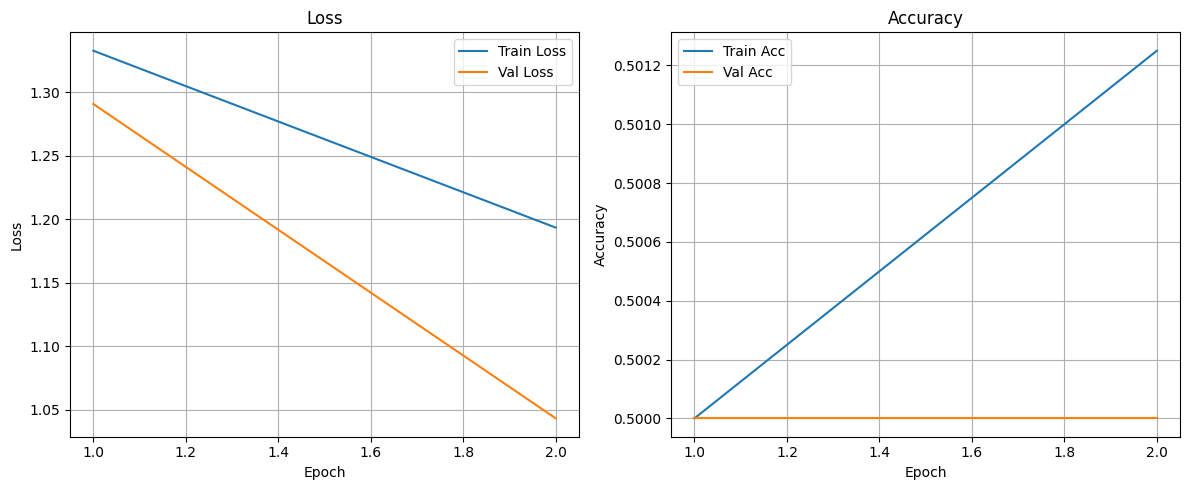

<Figure size 640x480 with 0 Axes>

In [26]:
# --- plotting helper: optional smoothing (moving average) ---
def smooth(y, window=1):
    if window <= 1:
        return np.array(y)
    kernel = np.ones(window) / window
    return np.convolve(y, kernel, mode='valid')

# Choose smoothing window (set to 1 for no smoothing, e.g. 5 for light smoothing)
smooth_window = 1

epochs_range = np.arange(1, len(train_losses) + 1)

if smooth_window > 1:
    pad = smooth_window // 2
    epochs_range = epochs_range[pad: -pad]

plt.figure(figsize=(12, 5))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, smooth(train_losses, smooth_window), label='Train Loss')
plt.plot(epochs_range, smooth(val_losses, smooth_window), label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, smooth(train_accs, smooth_window), label='Train Acc')
plt.plot(epochs_range, smooth(val_accs, smooth_window), label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the figure if you want:
plt.savefig("training_curves.png", bbox_inches='tight', dpi=150)


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd

def plot_tsne(embeddings, labels, class_names):
    """Generates and displays a t-SNE plot of the embeddings."""
    print("Running t-SNE... (this may take a moment)")
    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)
    
    # Create a DataFrame for easier plotting with seaborn
    df = pd.DataFrame({
        'tsne-1': tsne_results[:,0],
        'tsne-2': tsne_results[:,1],
        'label': [class_names[l] for l in labels]
    })
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="tsne-1", y="tsne-2",
        hue="label",
        palette=sns.color_palette("hls", len(class_names)),
        data=df,
        legend="full",
        alpha=0.8
    )
    plt.title('t-SNE Visualization of Graph Embeddings')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Motor Imagery Class')
    plt.show()

Running t-SNE... (this may take a moment)


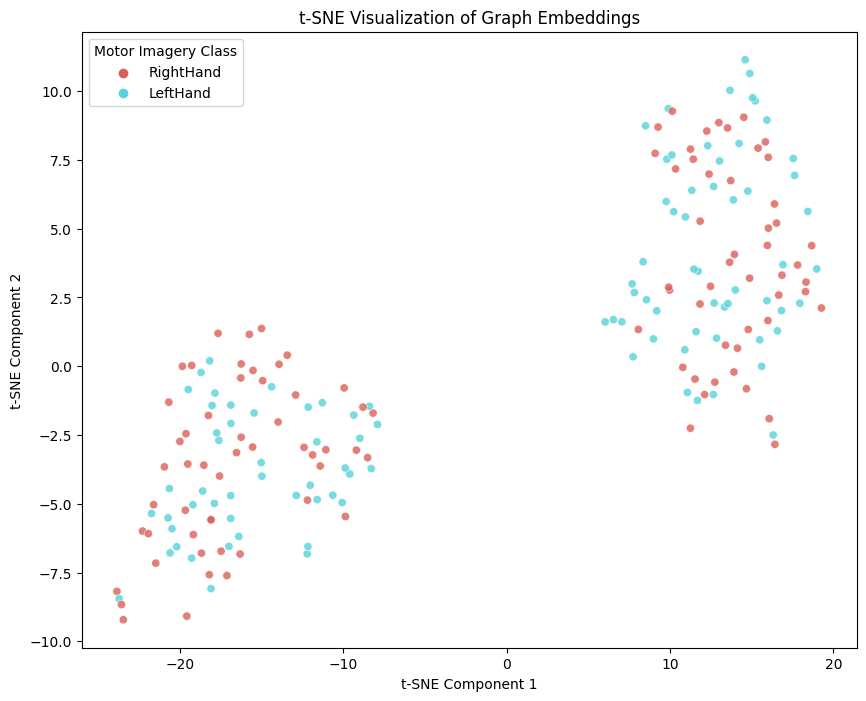

In [28]:
# --- AFTER your training loop finishes ---

# Load the best model weights
model.load_state_dict(torch.load('/kaggle/working/best_model.pt'))
model.eval()

# Collect all embeddings and labels from the validation set
all_embeddings = []
all_labels = []

with torch.no_grad():
    for data in val_loader:
        data = data.to(device)
        # The model now returns two items
        predictions, embeddings = model(data.x_raw, data.adj, data.batch)
        all_embeddings.append(embeddings.cpu().numpy())
        all_labels.append(data.y.cpu().numpy())

# Concatenate all batches
all_embeddings = np.concatenate(all_embeddings, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Generate the plot
plot_tsne(all_embeddings, all_labels, data_loader.class_names)

In [32]:
# =============================================
# Full sequential EEG subject training script
# =============================================

import os
import random
import torch
import torch.nn as nn
from torch_geometric.data import Data, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, cohen_kappa_score,
                             precision_recall_fscore_support, confusion_matrix,
                             balanced_accuracy_score)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# -------------------------
# Config
# -------------------------
subjects = list(range(1, 11))          # subjects 1..10
batch_size = 32
epochs = 2500
patience = 20
initial_lr = 0.001
weight_decay = 5e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_size = 0.2
val_size = 0.1
max_repeats = 3
test_acc_threshold = 0.0
output_dir = "./subject_experiments"
os.makedirs(output_dir, exist_ok=True)
DATASET_ROOT_PATH = '/kaggle/input/stroke-dataset-liu/edffile/edffile'
# Reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# -------------------------
# Helper functions
# -------------------------
def make_data_list(X, y, A):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    A_tensor = torch.tensor(A, dtype=torch.float32)
    data_list = []
    for i in range(len(X_tensor)):
        data = Data(x_raw=X_tensor[i], adj=A_tensor[i], y=y_tensor[i])
        data_list.append(data)
    return data_list

@torch.no_grad()
def evaluate_model(model, loader, criterion):
    model.eval()
    y_true, y_pred = [], []
    total_loss, n_samples = 0.0, 0
    for data in loader:
        data = data.to(device)
        out, _ = model(data.x_raw, data.adj, data.batch)
        loss = criterion(out, data.y)
        preds = out.argmax(dim=1).cpu().numpy()
        labels = data.y.cpu().numpy()
        y_pred.extend(preds.tolist())
        y_true.extend(labels.tolist())
        total_loss += loss.item() * data.num_graphs
        n_samples += data.num_graphs
    avg_loss = total_loss / n_samples
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0)
    precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
        y_true, y_pred, average='micro', zero_division=0)
    per_class_prec, per_class_rec, per_class_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    metrics = {
        'acc': float(acc),
        'balanced_acc': float(bal_acc),
        'kappa': float(kappa),
        'precision_macro': float(precision_macro),
        'recall_macro': float(recall_macro),
        'f1_macro': float(f1_macro),
        'precision_micro': float(precision_micro),
        'recall_micro': float(recall_micro),
        'f1_micro': float(f1_micro),
        'per_class_precision': per_class_prec.tolist(),
        'per_class_recall': per_class_rec.tolist(),
        'per_class_f1': per_class_f1.tolist(),
        'confusion_matrix': cm.tolist(),
        'avg_loss': float(avg_loss)
    }
    return metrics, y_true, y_pred

# -------------------------
# Sequential subject loop
# -------------------------
results = []

for subj in subjects:
    print(f"\n=== Subject {subj} ===")
    repeat = 0
    best_subject_result = None
    best_test_acc = -1.0

    while repeat < max_repeats:
        repeat += 1
        print(f"\nSubject {subj} - Attempt {repeat}/{max_repeats}")

        # --- Load data ---
        data_loader = AcuteStrokeMIDataloader(data_dir=DATASET_ROOT_PATH)
        X, y, A = data_loader.load_dataset(subject_ids=[subj])
        data_list = make_data_list(X, y, A)
        labels = y

        # --- Train/val/test split ---
        train_val, test_data = train_test_split(
            data_list, test_size=test_size, random_state=seed+repeat, stratify=labels)
        train_val_labels = [d.y.item() for d in train_val]
        val_relative = val_size / (1.0 - test_size)
        train_data, val_data = train_test_split(
            train_val, test_size=val_relative, random_state=seed+repeat, stratify=train_val_labels)

        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

        print(f"Samples: train={len(train_data)} val={len(val_data)} test={len(test_data)}")

        # --- Initialize model ---
        mff_module = MFFModule(feature_dim=32).to(device)
        model = EndToEnd_MFF_GAT(
            mff_module, hidden_channels=20, heads=4, num_classes=4, n_channels=33).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=initial_lr, weight_decay=weight_decay)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
        criterion = nn.CrossEntropyLoss()
        early_stopping = EarlyStopping(
            patience=patience, verbose=False, path=os.path.join(output_dir, f'best_model_subj{subj}_attempt{repeat}.pt'))

        # --- Training helpers ---
        def train_epoch(loader):
            model.train()
            total_loss, correct, n_samples = 0.0, 0, 0
            for data in loader:
                data = data.to(device)
                optimizer.zero_grad()
                out, _ = model(data.x_raw, data.adj, data.batch)
                loss = criterion(out, data.y)
                loss.backward()
                optimizer.step()
                total_loss += loss.item() * data.num_graphs
                pred = out.argmax(dim=1)
                correct += int((pred == data.y).sum())
                n_samples += data.num_graphs
            avg_loss = total_loss / n_samples
            acc = correct / n_samples
            return avg_loss, acc

        def eval_acc_loss(loader):
            model.eval()
            correct, total_loss, n_samples = 0, 0.0, 0
            for data in loader:
                data = data.to(device)
                out, _ = model(data.x_raw, data.adj, data.batch)
                loss = criterion(out, data.y)
                pred = out.argmax(dim=1)
                correct += int((pred == data.y).sum())
                total_loss += loss.item() * data.num_graphs
                n_samples += data.num_graphs
            acc = correct / n_samples
            avg_loss = total_loss / n_samples
            return acc, avg_loss

        # --- Training loop with tqdm ---
        train_losses, val_losses, train_accs, val_accs = [], [], [], []
        for epoch in tqdm(range(1, epochs+1), desc=f"Subject {subj} Attempt {repeat}"):
            train_loss, train_acc = train_epoch(train_loader)
            val_acc, val_loss = eval_acc_loss(val_loader)

            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accs.append(train_acc)
            val_accs.append(val_acc)

            scheduler.step()
            early_stopping(val_loss, model)
            if early_stopping.early_stop:
                break

        # Load best model
        try:
            model.load_state_dict(torch.load(os.path.join(output_dir, f'best_model_subj{subj}_attempt{repeat}.pt')))
        except Exception:
            pass

        # --- Save per-epoch metrics + learning curve ---
        metrics_df = pd.DataFrame({
            "train_loss": train_losses,
            "val_loss": val_losses,
            "train_acc": train_accs,
            "val_acc": val_accs
        })
        metrics_df.to_csv(f"{output_dir}/subject{subj}_attempt{repeat}_epochs.csv", index=False)

        plt.figure()
        plt.plot(train_losses, label='train_loss')
        plt.plot(val_losses, label='val_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Subject {subj} Attempt {repeat} Learning Curve')
        plt.legend()
        plt.savefig(f"{output_dir}/subject{subj}_attempt{repeat}_learning_curve.png")
        plt.close()

        # --- Test evaluation + save predictions ---
        test_metrics, y_true_test, y_pred_test = evaluate_model(model, test_loader, criterion)
        pd.DataFrame({"y_true": y_true_test, "y_pred": y_pred_test}).to_csv(
            f"{output_dir}/subject{subj}_attempt{repeat}_predictions.csv", index=False)
        pd.DataFrame(test_metrics["confusion_matrix"]).to_csv(
            f"{output_dir}/subject{subj}_attempt{repeat}_confusion_matrix.csv", index=False)

        # --- Save best attempt per subject ---
        if test_metrics['acc'] > best_test_acc:
            best_test_acc = test_metrics['acc']
            best_subject_result = test_metrics
            torch.save(model.state_dict(), os.path.join(output_dir, f'best_final_model_subj{subj}.pt'))
        results.append({
            "subject": subj,
            "attempt": repeat,
            **test_metrics,
            "train_epochs_ran": len(train_losses)
        })

        # Stop repeats if threshold reached
        if test_metrics['acc'] >= test_acc_threshold:
            print(f"Subject {subj} reached threshold. Moving to next subject.")
            break
        else:
            print(f"Subject {subj} did NOT reach threshold. Retrying...")

        # Append results
        results.append({
            "subject": subj,
            "attempt": repeat,
            **test_metrics,
            "train_epochs_ran": len(train_losses)
        })

# -------------------------
# Save final results
# -------------------------
df = pd.DataFrame(results)
df.to_csv(os.path.join(output_dir, "subject_experiment_results.csv"), index=False)
print(f"\nAll results saved to {os.path.join(output_dir, 'subject_experiment_results.csv')}")

# Summary per subject
summary = df.sort_values(['subject', 'acc'], ascending=[True, False]).groupby('subject').first().reset_index()
summary.to_csv(os.path.join(output_dir, "subject_experiment_summary.csv"), index=False)
print("\nPer-subject best attempts:")
print(summary[['subject','attempt','acc','kappa','f1_macro']])



=== Subject 1 ===

Subject 1 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [1]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-01:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 1 Attempt 1:   7%|▋         | 187/2500 [11:06<2:17:21,  3.56s/it]


Subject 1 reached threshold. Moving to next subject.

=== Subject 2 ===

Subject 2 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [2]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-02:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 2 Attempt 1:   8%|▊         | 200/2500 [11:51<2:16:27,  3.56s/it]


Subject 2 reached threshold. Moving to next subject.

=== Subject 3 ===

Subject 3 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [3]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-03:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 3 Attempt 1:   7%|▋         | 165/2500 [09:45<2:18:03,  3.55s/it]


Subject 3 reached threshold. Moving to next subject.

=== Subject 4 ===

Subject 4 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [4]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-04:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 4 Attempt 1:   9%|▊         | 216/2500 [12:47<2:15:12,  3.55s/it]


Subject 4 reached threshold. Moving to next subject.

=== Subject 5 ===

Subject 5 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [5]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-05:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 5 Attempt 1:   8%|▊         | 198/2500 [11:41<2:15:52,  3.54s/it]


Subject 5 reached threshold. Moving to next subject.

=== Subject 6 ===

Subject 6 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [6]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-06:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 6 Attempt 1:  12%|█▏        | 288/2500 [17:01<2:10:42,  3.55s/it]


Subject 6 reached threshold. Moving to next subject.

=== Subject 7 ===

Subject 7 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [7]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-07:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 7 Attempt 1:   4%|▍         | 107/2500 [06:20<2:21:52,  3.56s/it]


Subject 7 reached threshold. Moving to next subject.

=== Subject 8 ===

Subject 8 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [8]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-08:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 8 Attempt 1:   7%|▋         | 172/2500 [10:08<2:17:22,  3.54s/it]


Subject 8 reached threshold. Moving to next subject.

=== Subject 9 ===

Subject 9 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [9]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-09:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 9 Attempt 1:   9%|▉         | 219/2500 [12:53<2:14:18,  3.53s/it]


Subject 9 reached threshold. Moving to next subject.

=== Subject 10 ===

Subject 10 - Attempt 1/3
Windowing: 25 windows of 500 samples per 2000-sample epoch.
Starting dataset loading process...
  Subjects to load: [10]
  Filter settings: 8.0-30.0 Hz band-pass, 50.0 Hz notch.

Processing sub-10:
  > Found 40 epochs (20 Left, 20 Right).
  > Extracted 1000 windows and 1000 adjacency matrices.

Applying channel-wise z-score normalization...

Dataset loading complete.
  Final shape of X (data): (1000, 33, 500)
  Final shape of y (labels): (1000,)
  Final shape of A (adjacency matrices): (1000, 33, 33)
  Class distribution: {0: 500, 1: 500}
Samples: train=700 val=100 test=200


Subject 10 Attempt 1:   4%|▎         | 91/2500 [05:23<2:22:54,  3.56s/it]


Subject 10 reached threshold. Moving to next subject.

All results saved to ./subject_experiments/subject_experiment_results.csv

Per-subject best attempts:
   subject  attempt    acc  kappa  f1_macro
0        1        1  0.870   0.74  0.869163
1        2        1  0.920   0.84  0.919872
2        3        1  0.875   0.75  0.874847
3        4        1  0.825   0.65  0.824891
4        5        1  0.905   0.81  0.904979
5        6        1  0.920   0.84  0.919799
6        7        1  0.895   0.79  0.894871
7        8        1  0.910   0.82  0.909856
8        9        1  0.910   0.82  0.909774
9       10        1  0.935   0.87  0.934998
